In [1]:
import pandas as pd

df = pd.read_csv(
    "../datasets/grades/dataT_CC1.csv"
    )
df.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_33216\97334845.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CALIFICACION,2018,2019,2020,2021,2022,2023
0,A,286,285,630,551,382,308
1,B,430,475,695,638,502,364
2,C,643,670,583,593,626,439
3,D,497,464,237,292,337,341
4,F,445,554,95,216,257,317


In [2]:
df_long = pd.melt(df, id_vars=['CALIFICACION'], var_name='Year', value_name='Valor')

df_long.head()

,CALIFICACION,Year,Valor
0,A,2018,286
1,B,2018,430
2,C,2018,643
3,D,2018,497
4,F,2018,445


In [3]:
df_long.describe()

,Valor
count,48.000000
mean,325.416667
std,196.479855
min,25.000000
25%,162.750000
50%,289.000000
75%,480.500000
max,695.000000


In [4]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CALIFICACION  48 non-null     object
 1   Year          48 non-null     object
 2   Valor         48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
df_long['Year'].unique()

array(['2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [6]:
df_long['CALIFICACION'].unique()

array(['A', 'B', 'C', 'D', 'F', 'I', 'N', 'R'], dtype=object)

In [13]:
df_long['Year'] = df_long['Year'].astype(int)

In [7]:
data = df_long.set_index(['Year'])

In [8]:
data.head()

,CALIFICACION,Valor
Year,,
2018,A,286
2018,B,430
2018,C,643
2018,D,497
2018,F,445


In [9]:
import numpy as np 
data['Time'] = np.arange(len(data.index))
data.head()

,CALIFICACION,Valor,Time
Year,,,
2018,A,286,0
2018,B,430,1
2018,C,643,2
2018,D,497,3
2018,F,445,4


### Datos ajustados por grupo(no tiene relevancia)

In [10]:
data_1 = data.groupby(['CALIFICACION'],).mean()
data_1.head()

,Valor,Time
CALIFICACION,,
A,407.000000,20.0
B,517.333333,21.0
C,592.333333,22.0
D,361.333333,23.0
F,314.000000,24.0


Text(0.5, 1.0, 'Time Plot of Grades')

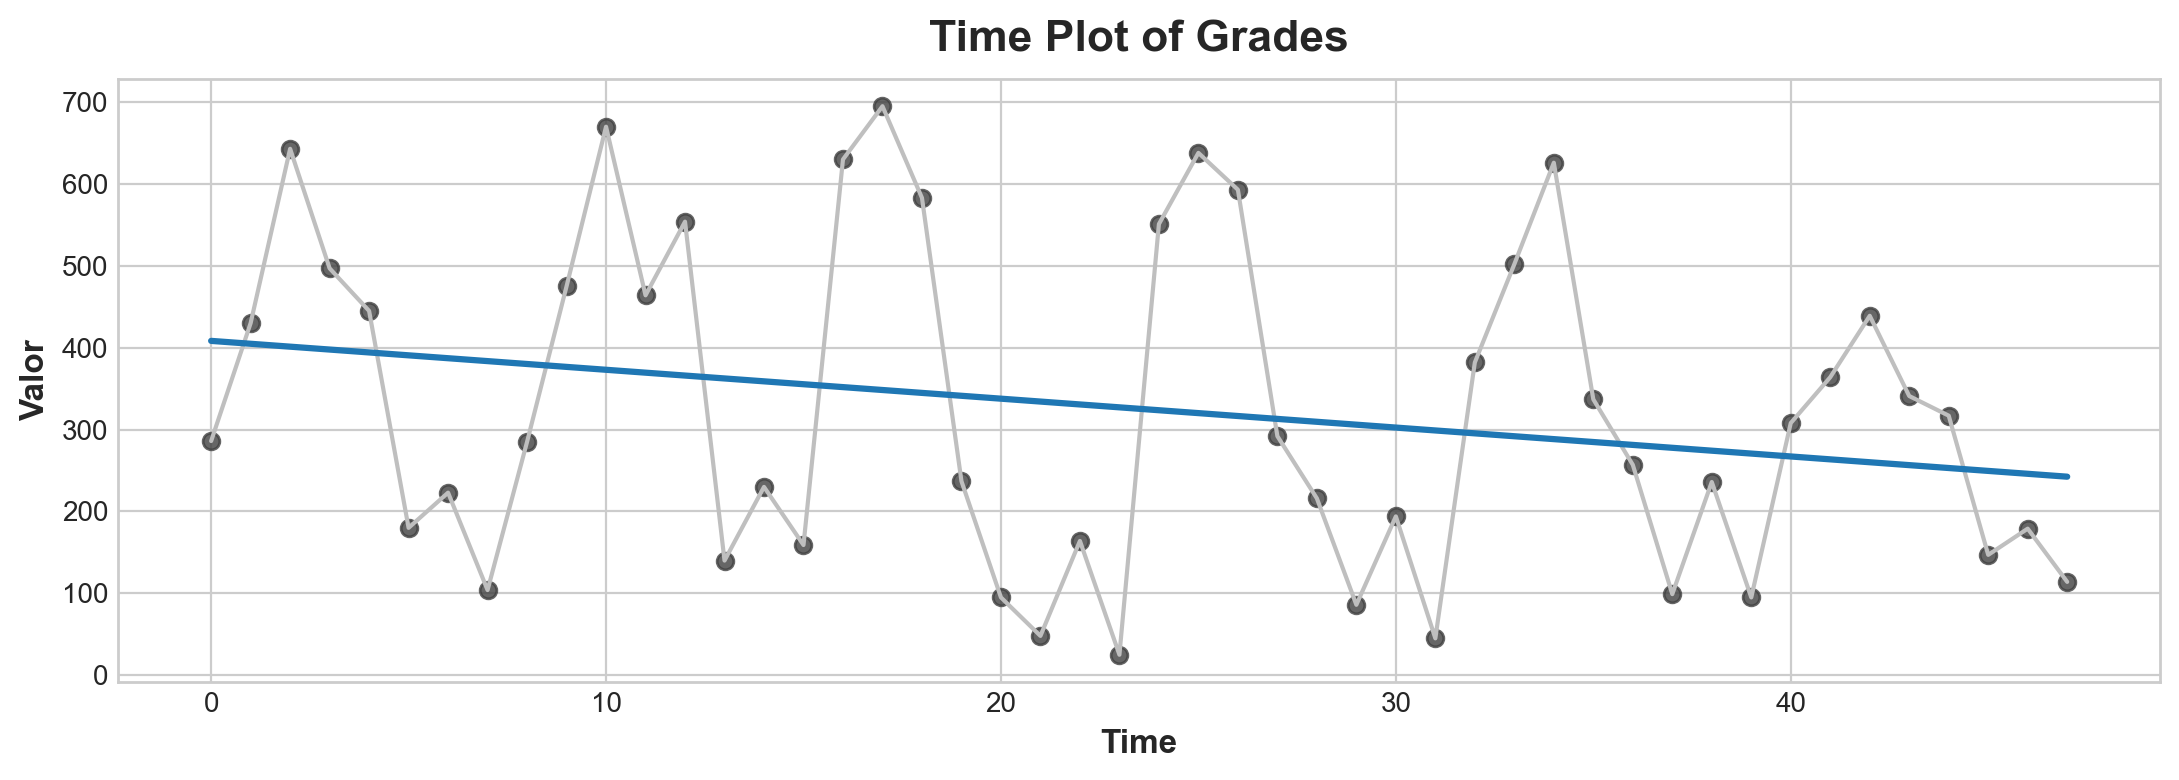

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Valor', data=data, color='0.75')
ax = sns.regplot(data=data, x='Time', y='Valor', ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Grades')
#ax.set_ylabel('Number of years')

## PROPHET TIME SERIES REGRESSION

In [29]:
from prophet import Prophet

# function to predict
def predict_with_prophet(df, years_to_predict=5):
    df_p = df.rename(columns={'Year':'ds', 'Valor':'y'})
    df_p['ds'] = pd.to_datetime(df_p['ds'],format='%Y')
    model = Prophet(yearly_seasonality=False, daily_seasonality=False)
    model.fit(df_p)
    future = model.make_future_dataframe(periods=years_to_predict, freq='YE')
    forecast = model.predict(future)
    forecast['ds'] = forecast['ds'].dt.year
    return forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

predictions=[]
predictions1 = {}
for calificacion in df['CALIFICACION']:
    df_subset = df_long[df_long['CALIFICACION']==calificacion]
    forecast = predict_with_prophet(df_subset)
    forecast['CALIFICACION'] = calificacion
    predictions.append(forecast)
    predictions1[calificacion] = forecast

df_forecast = pd.concat(predictions)


18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
df_forecast.head()

,ds,yhat,yhat_lower,yhat_upper,CALIFICACION
0,2018,383.714100,224.466915,560.478812,A
1,2019,392.979838,210.511939,558.001789,A
2,2020,402.245577,234.260071,566.447455,A
3,2021,411.536701,243.757898,580.062497,A
4,2022,420.802439,256.903557,586.473747,A


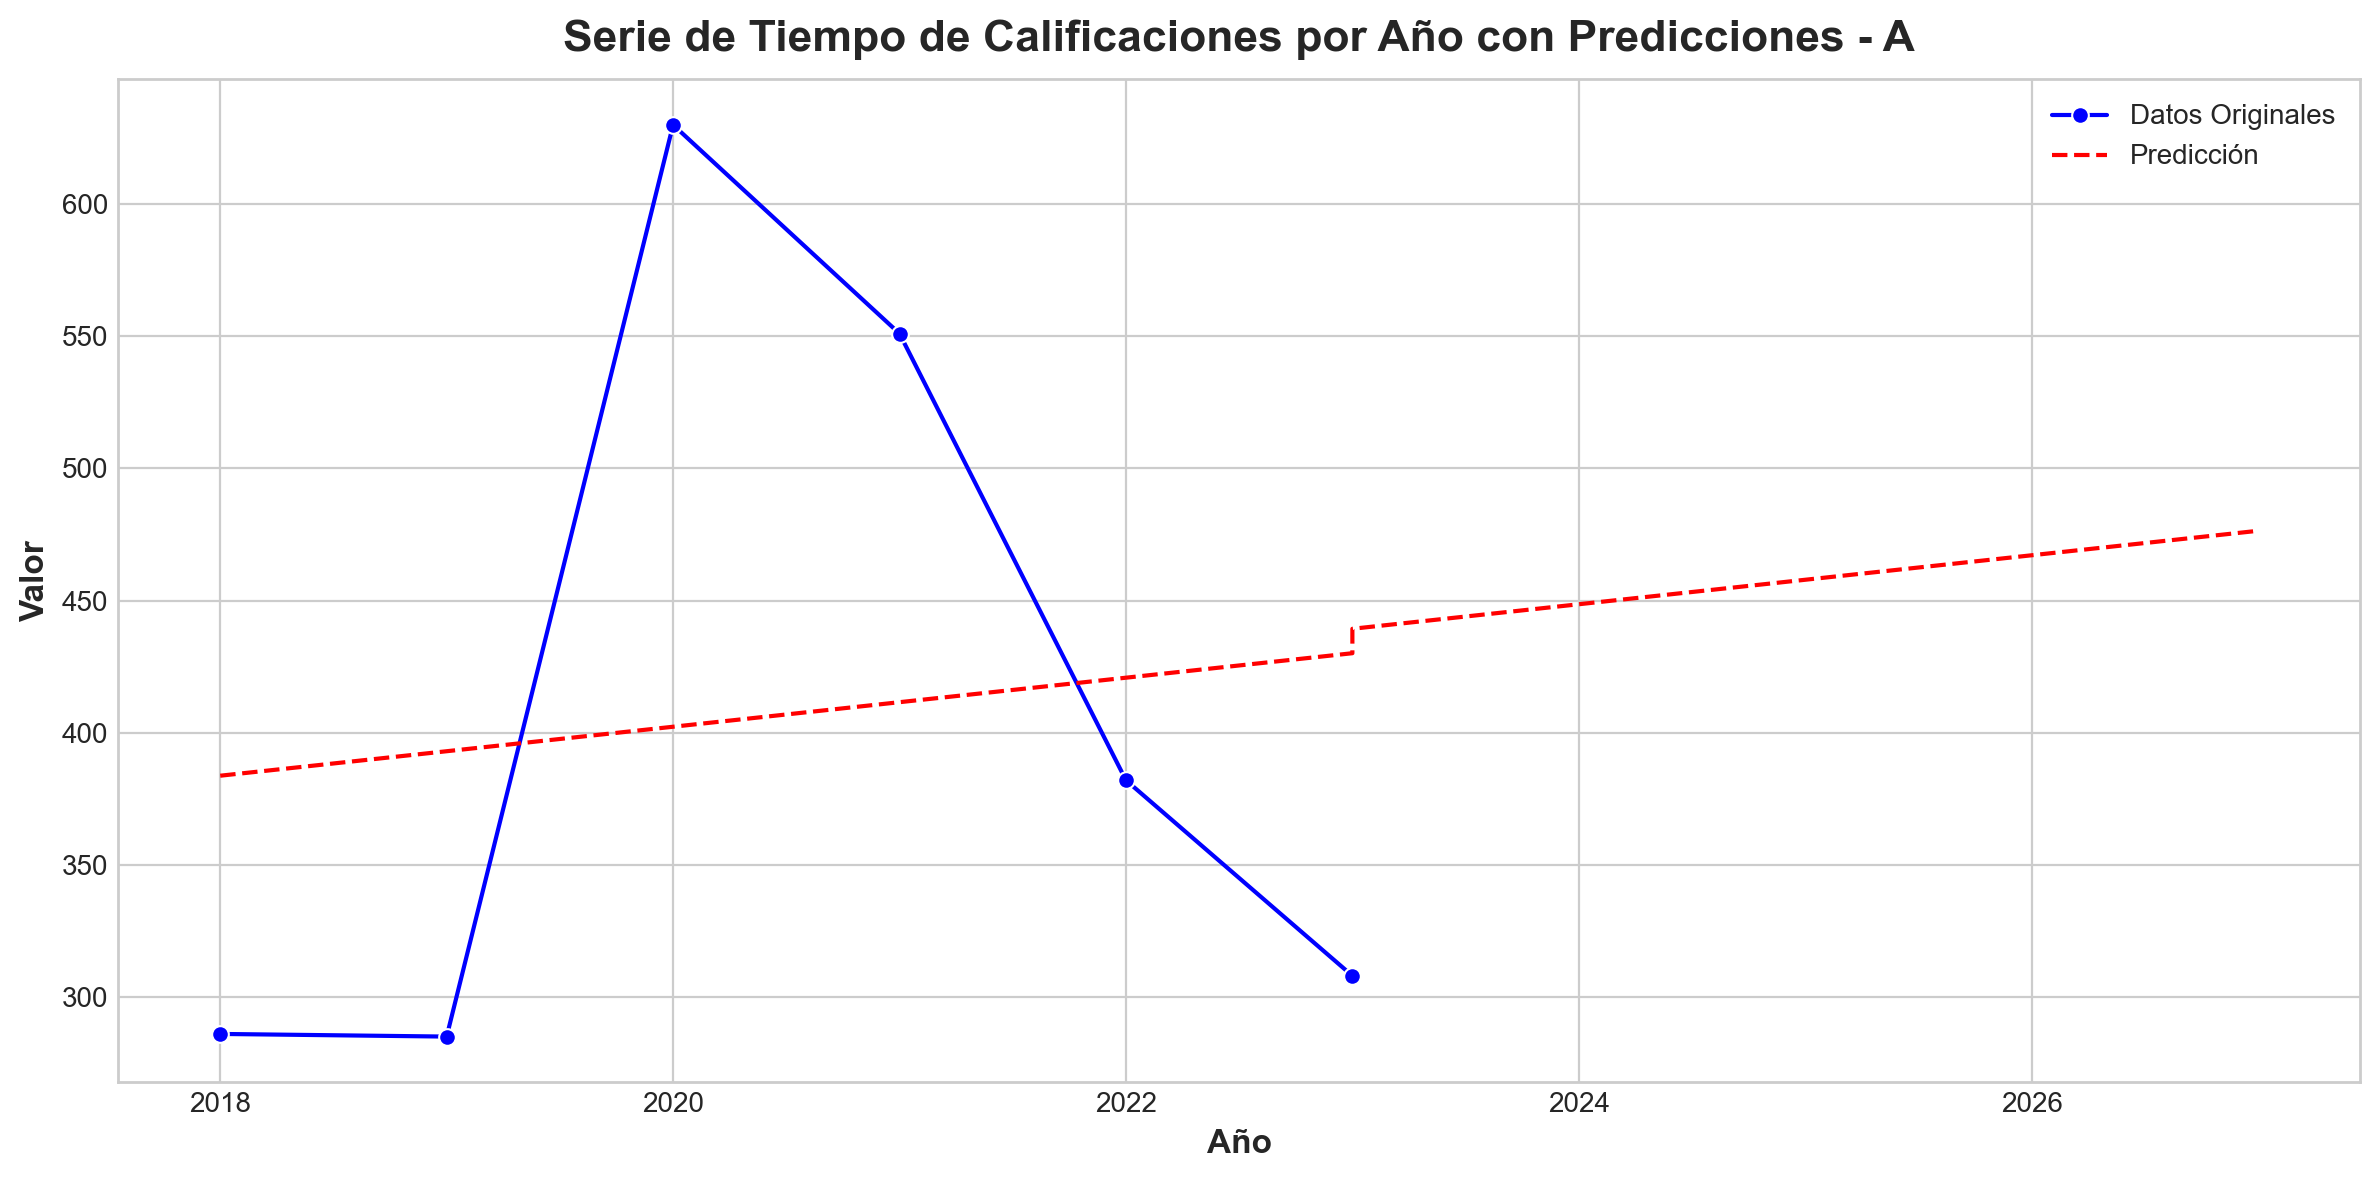

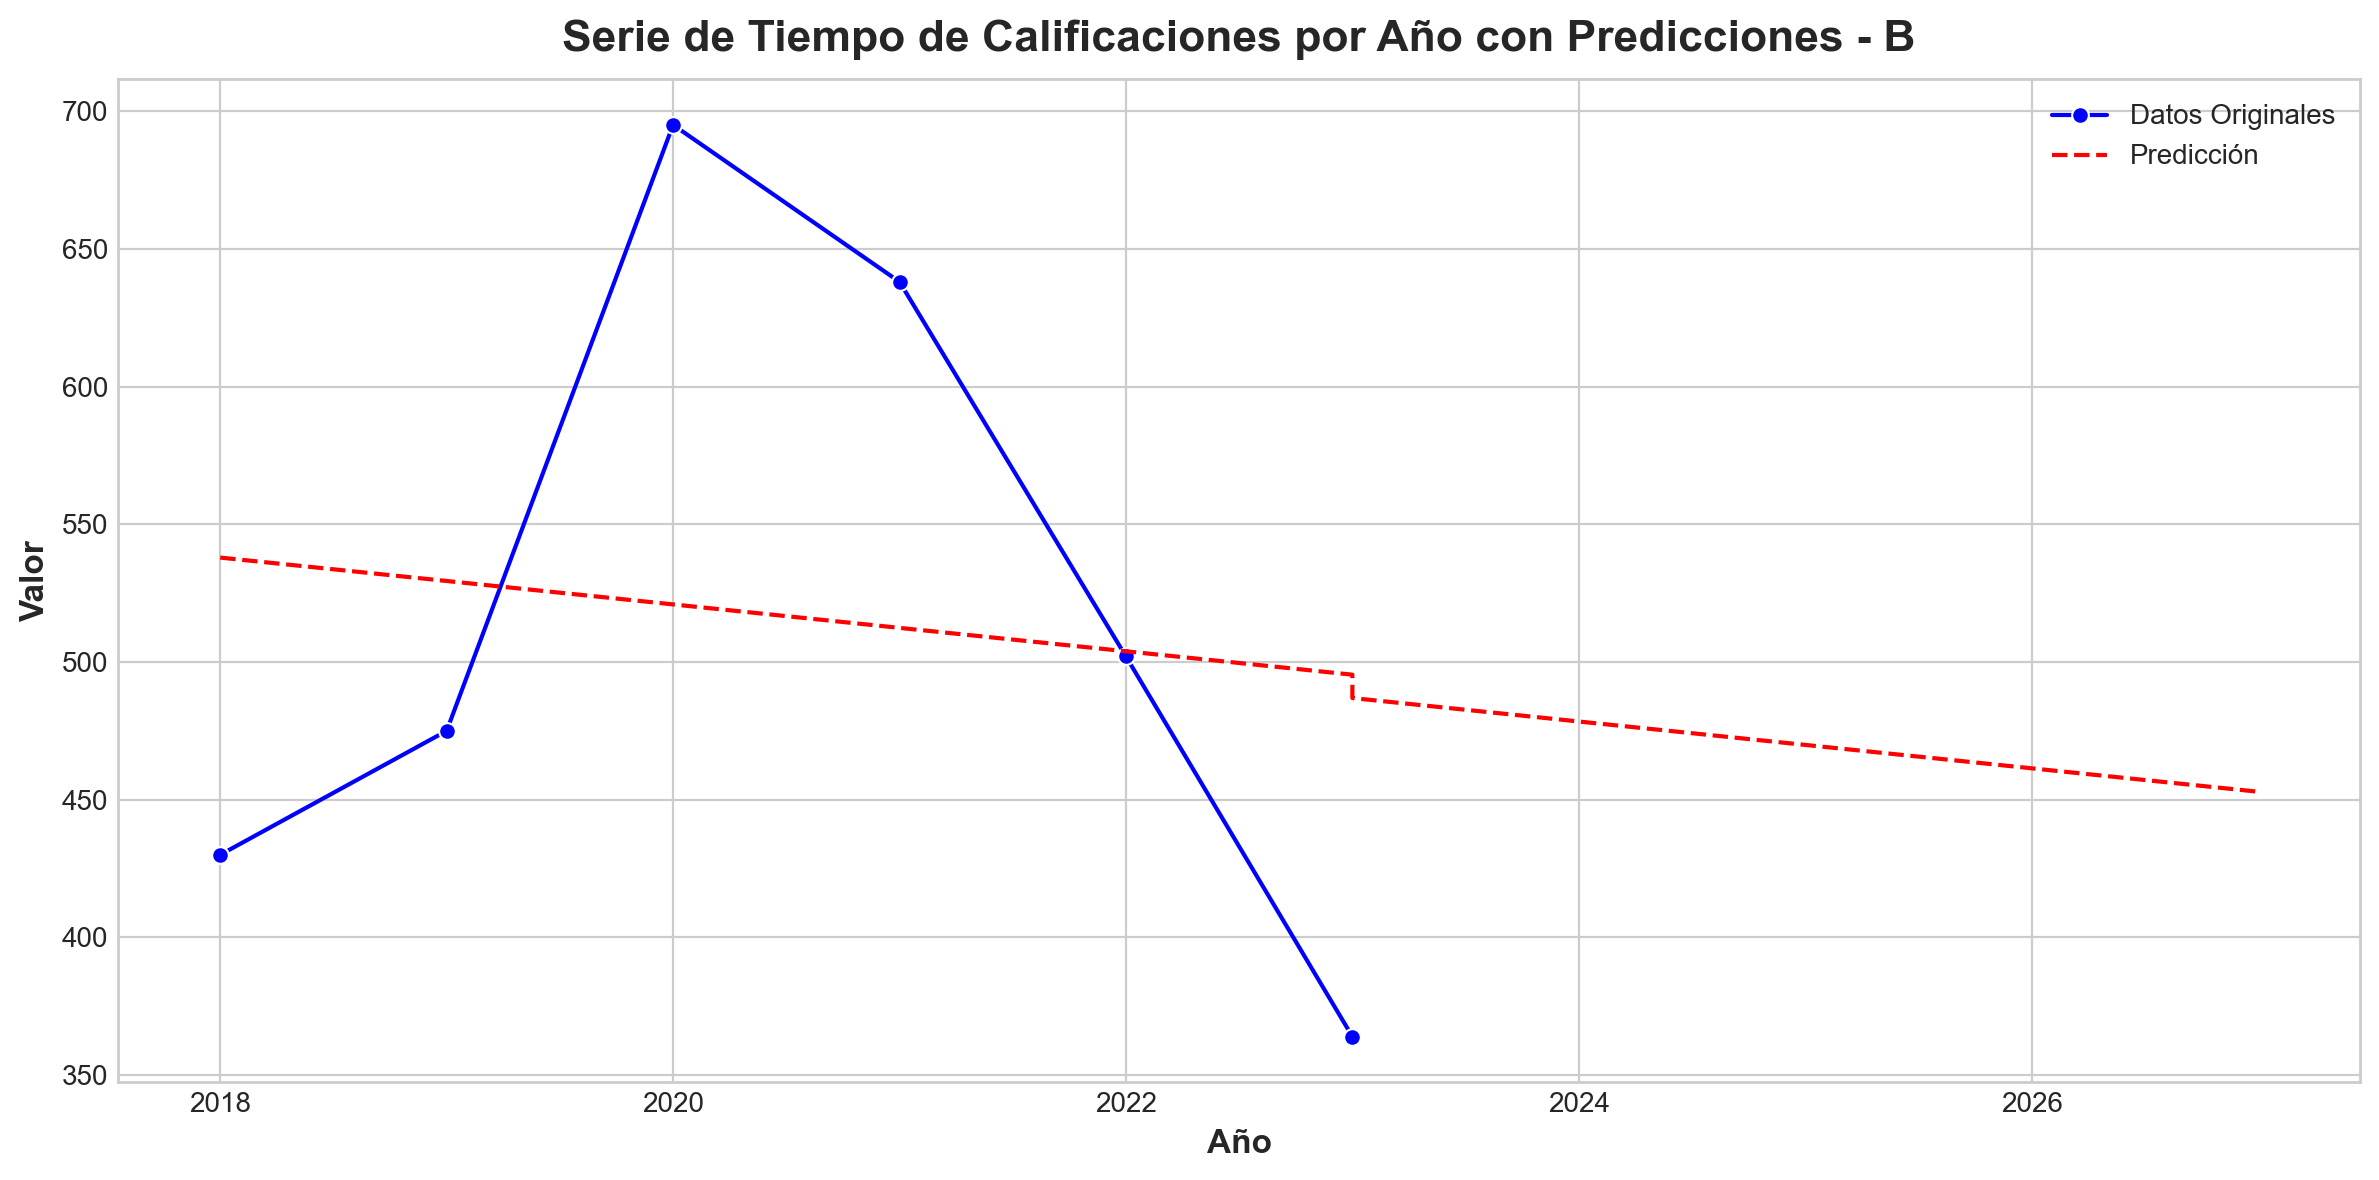

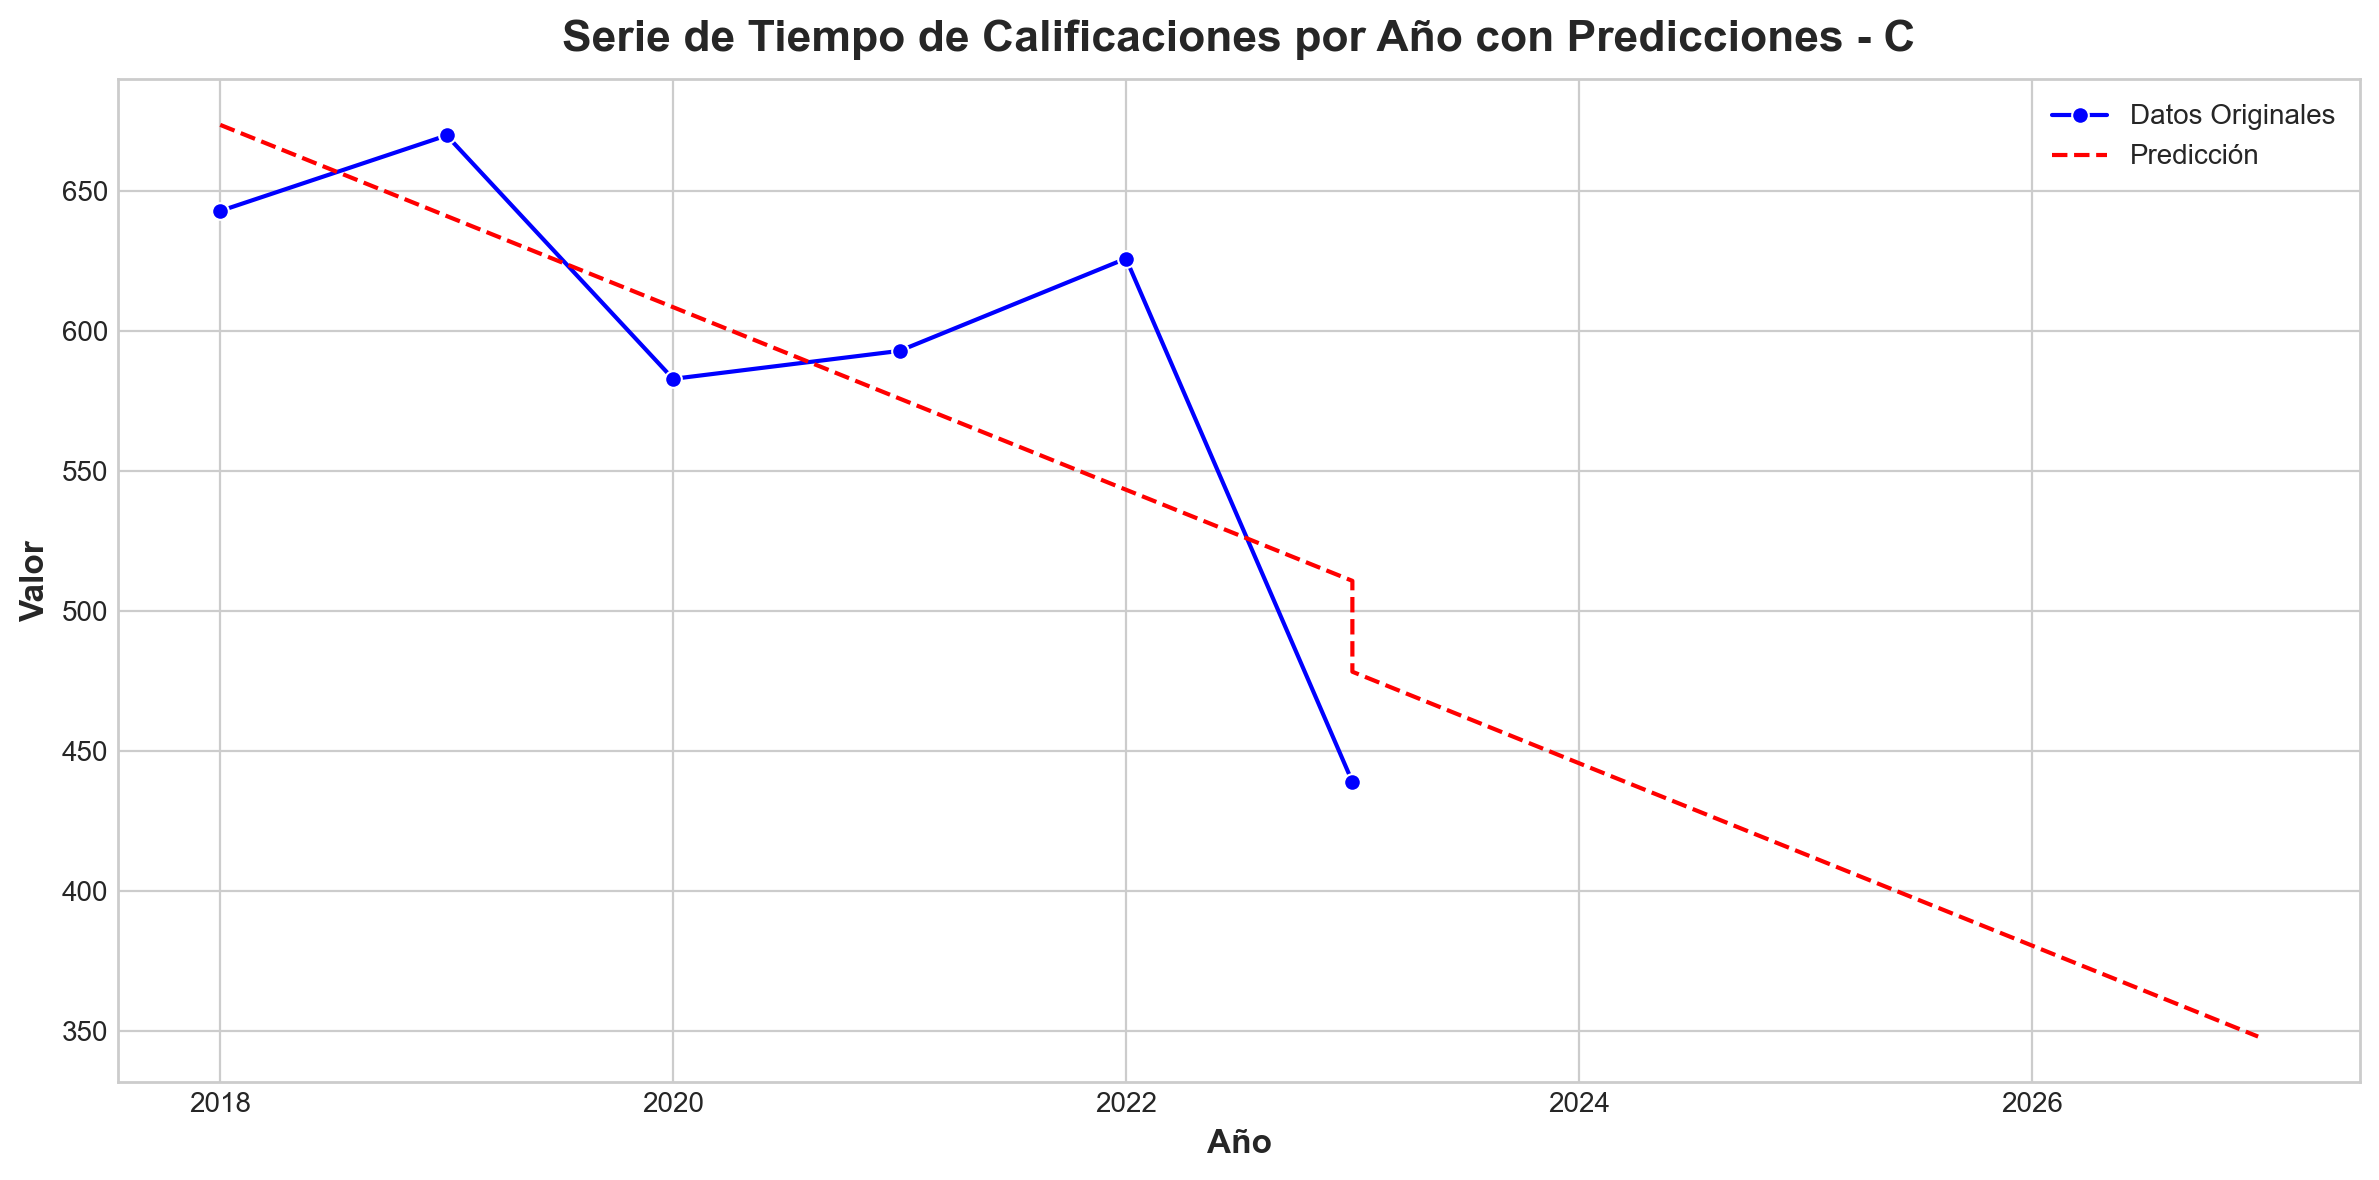

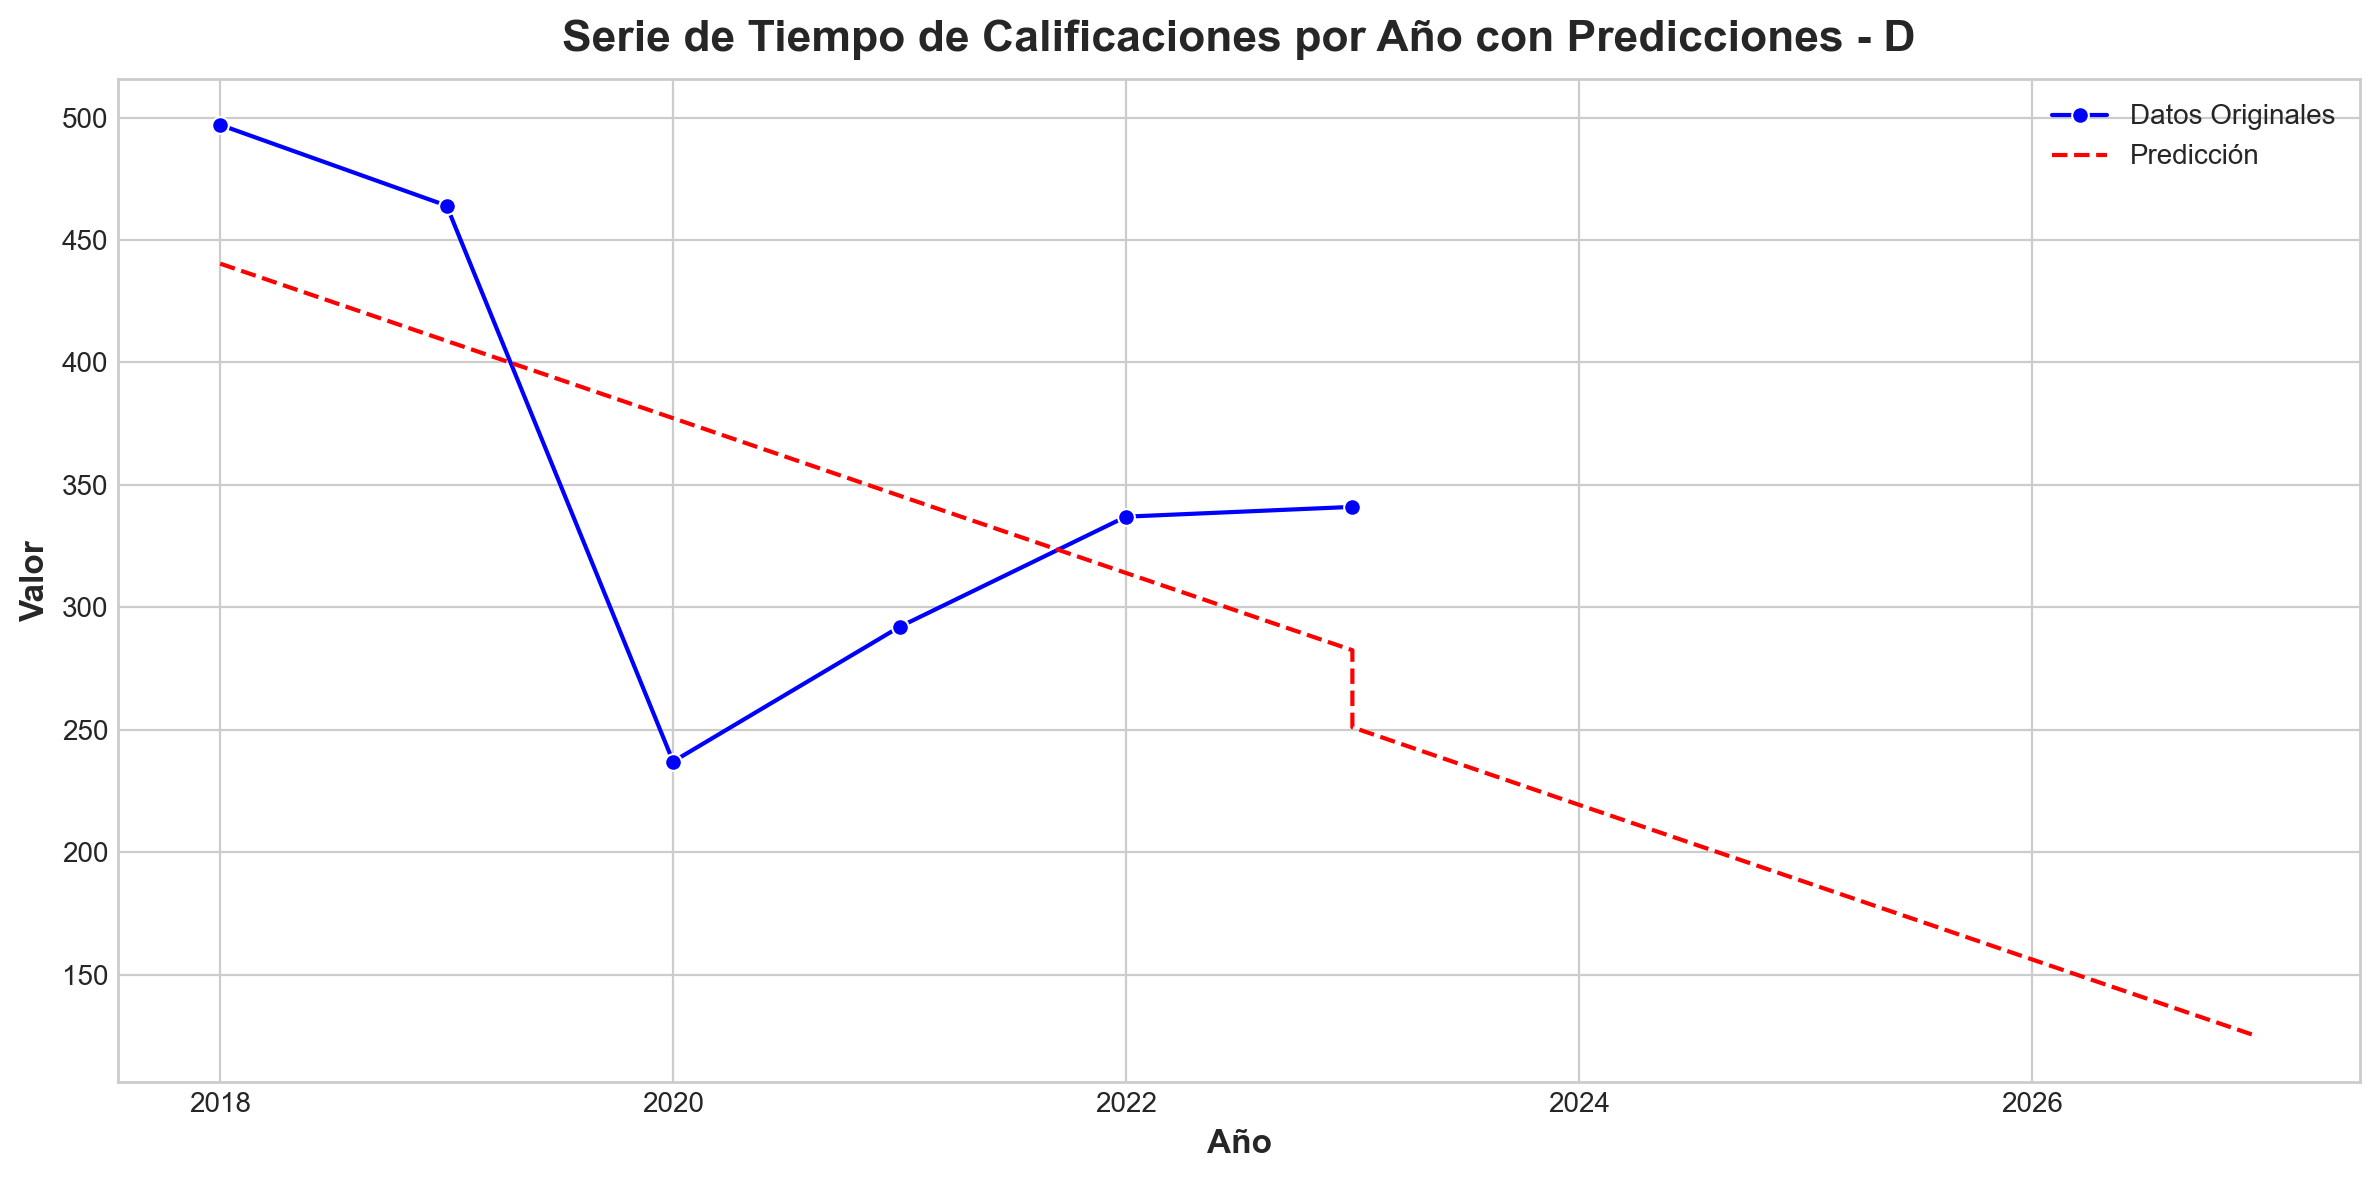

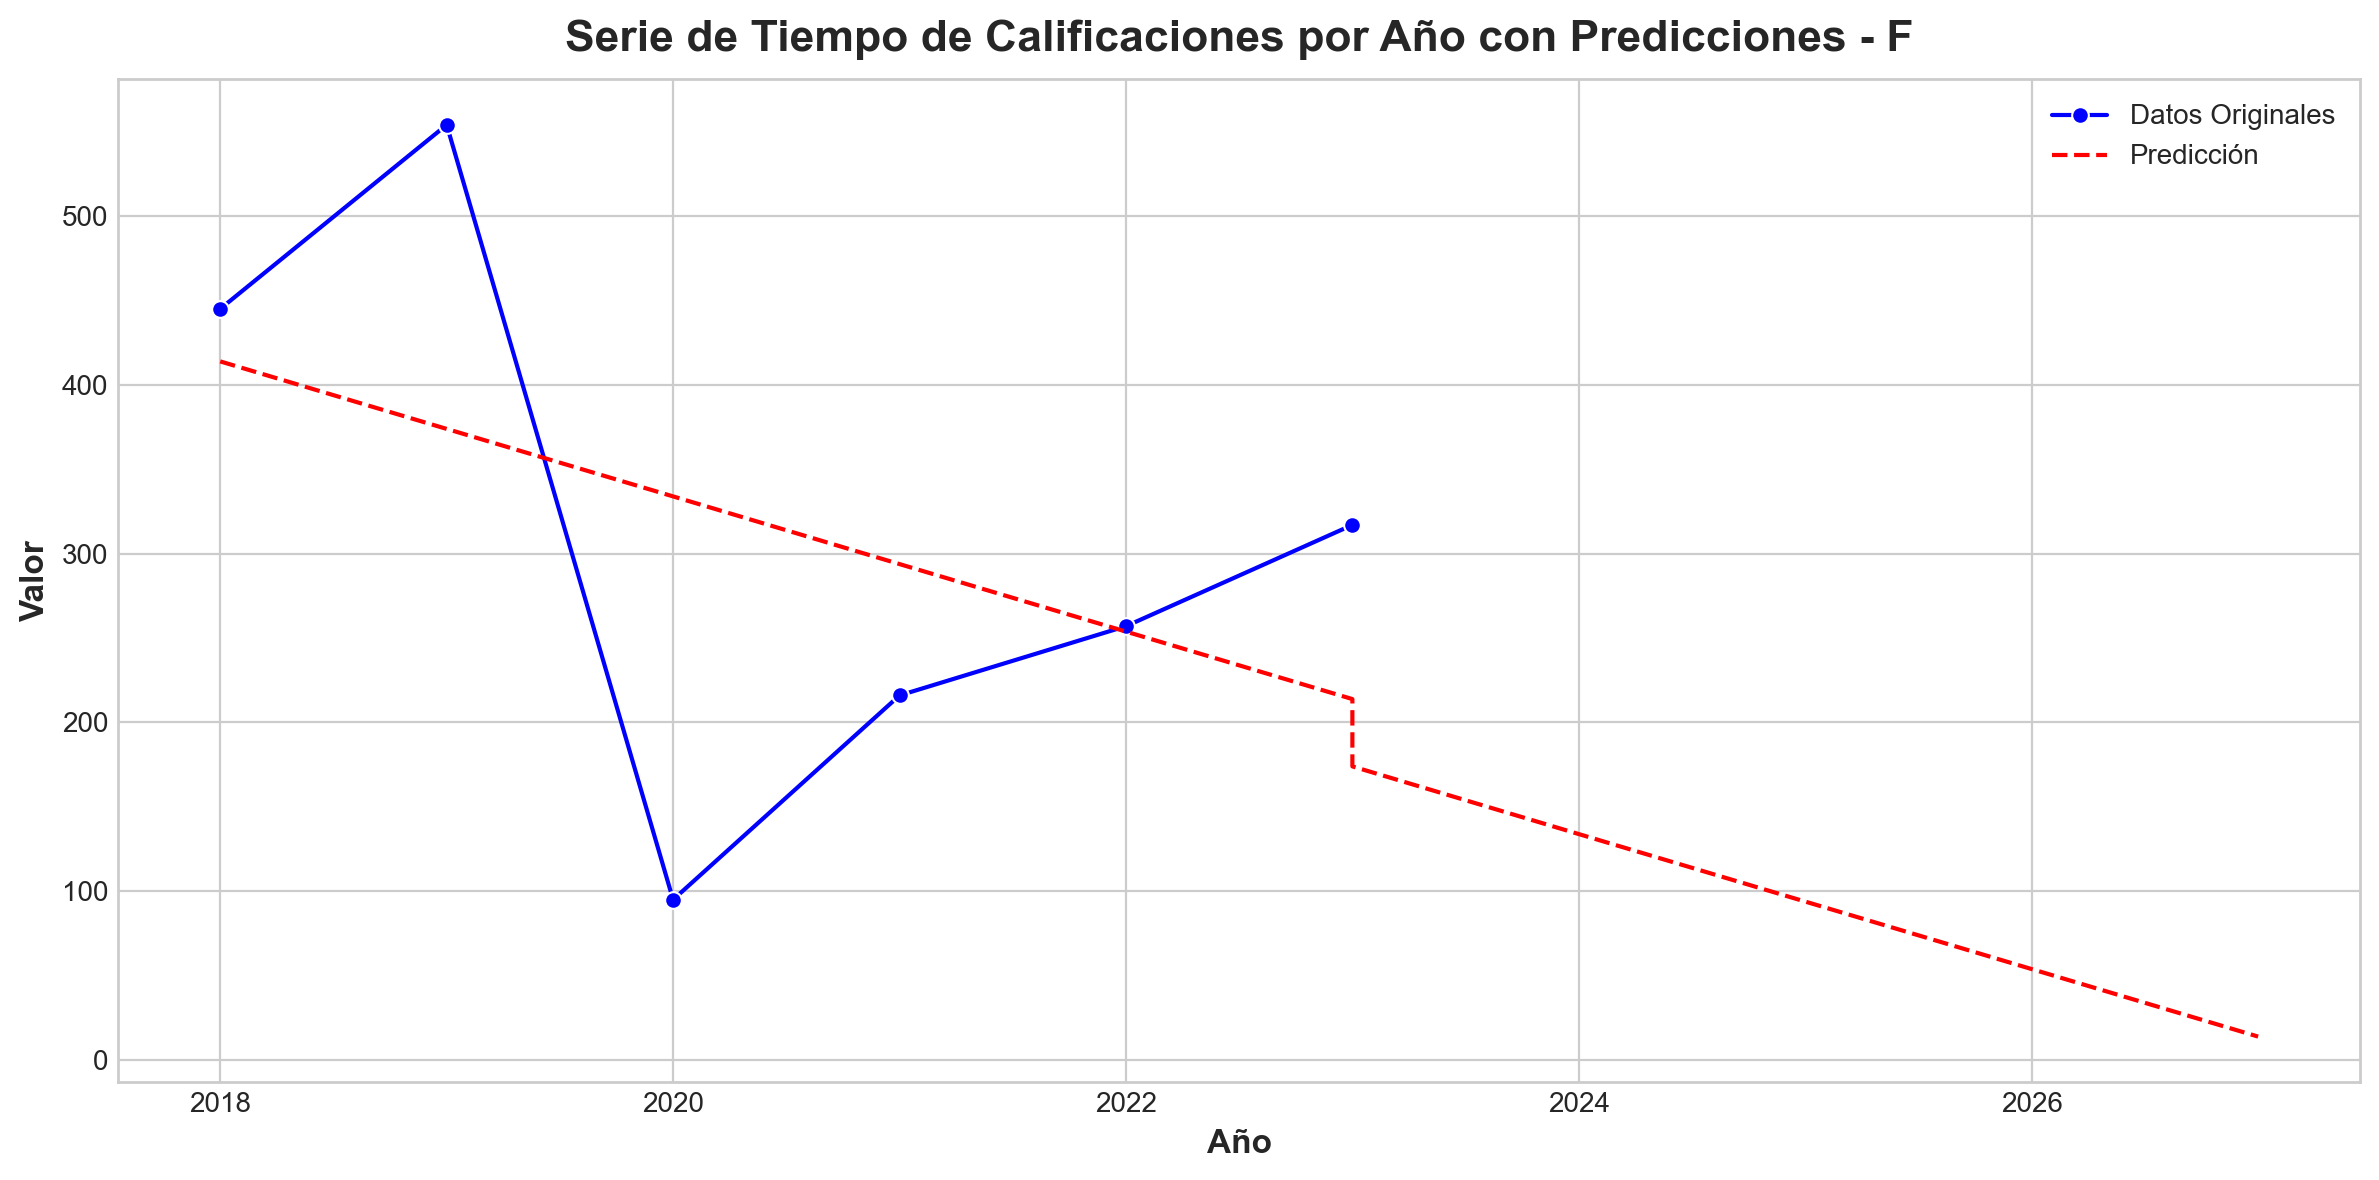

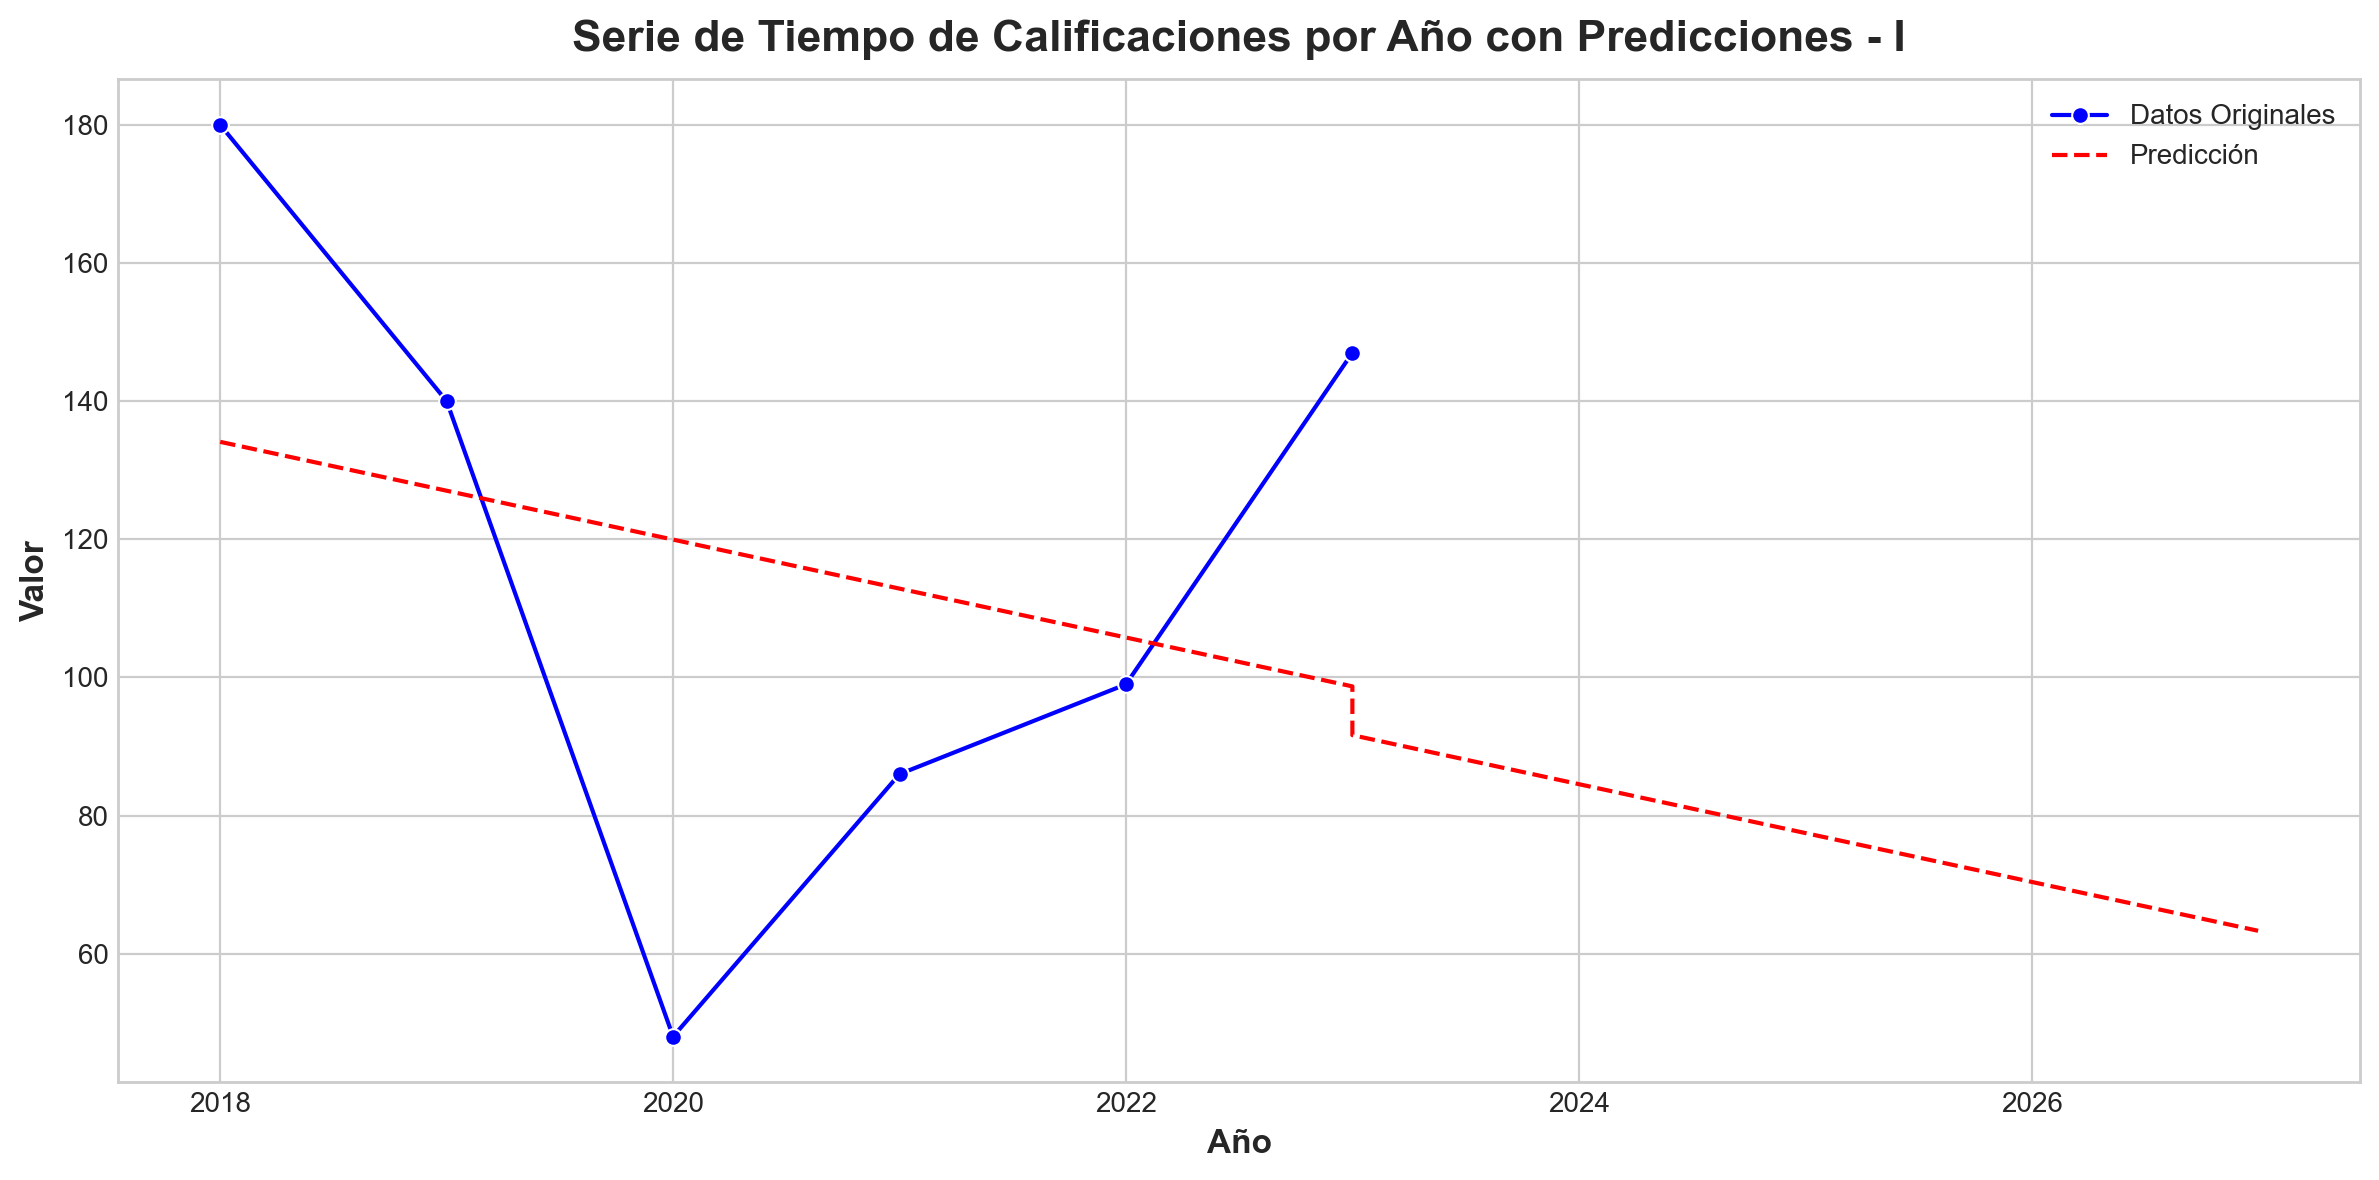

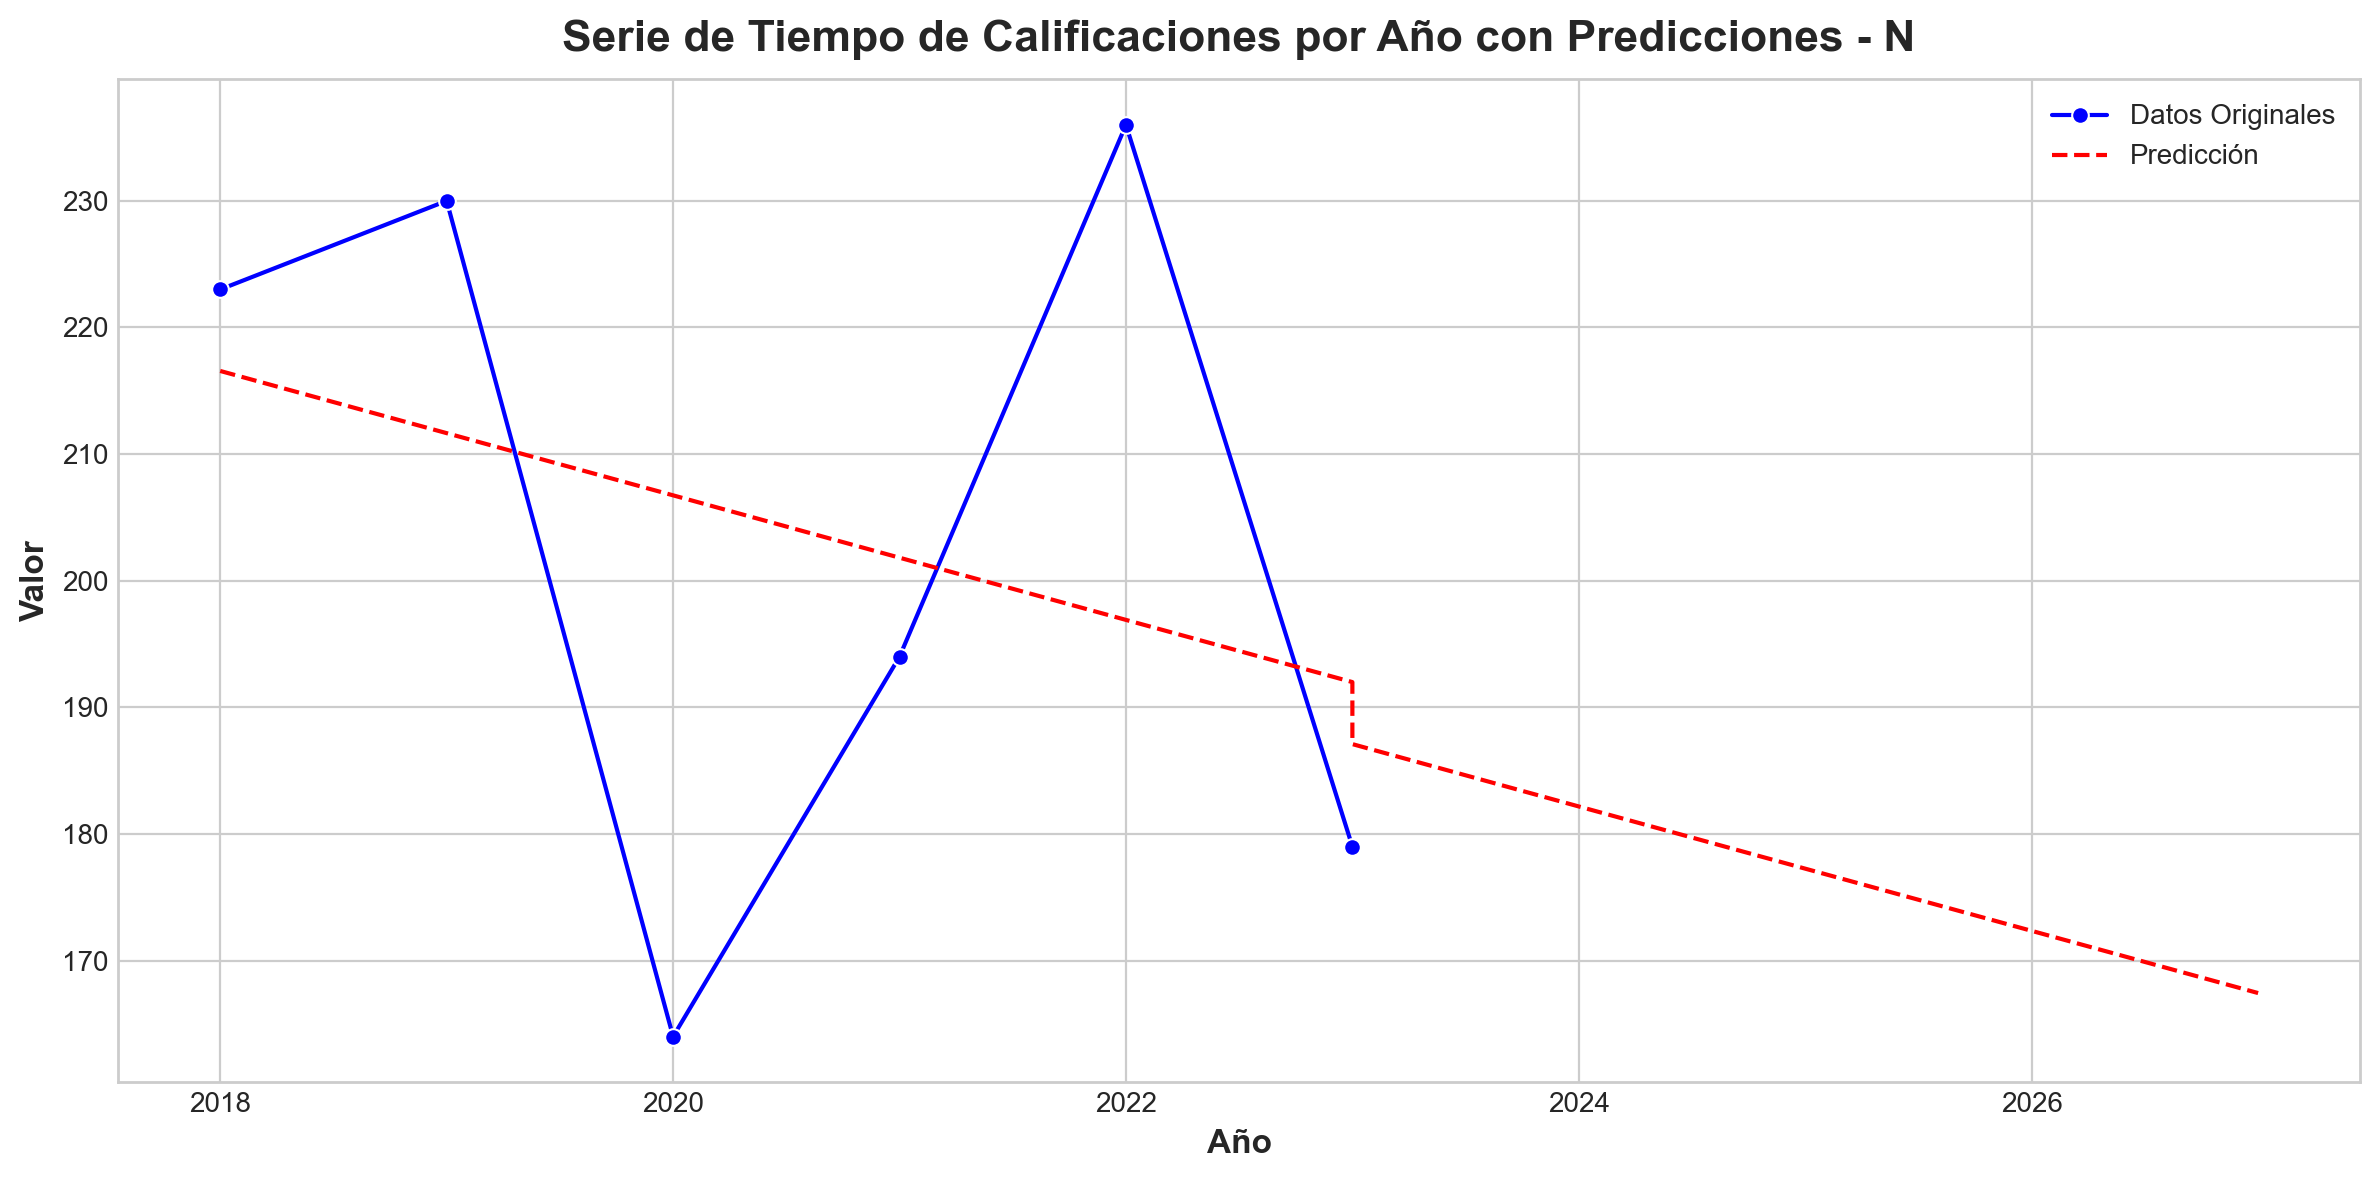

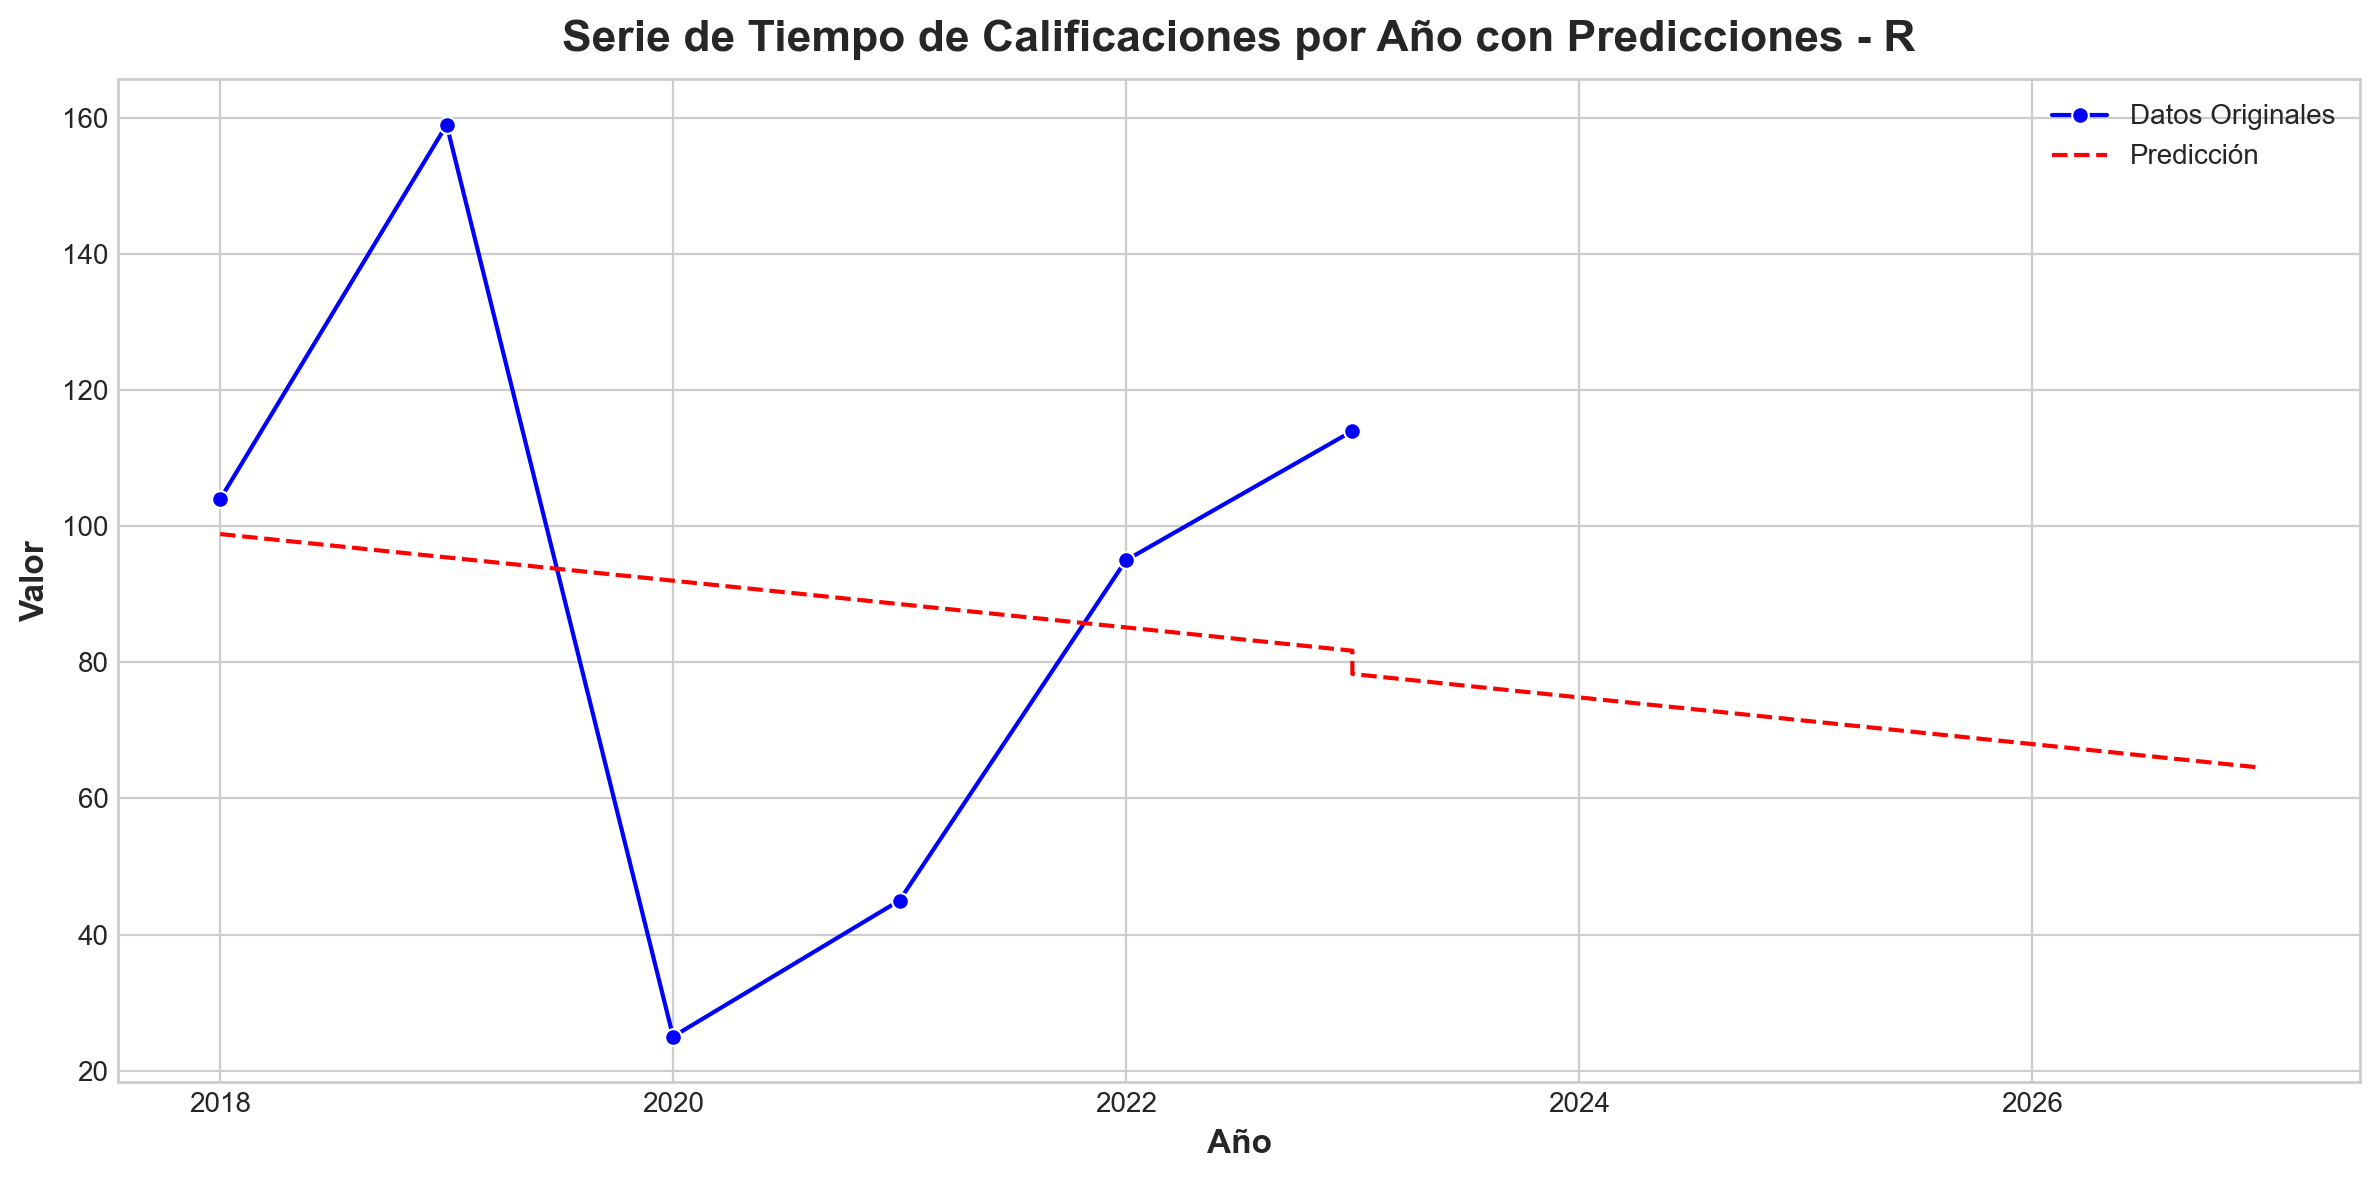

In [30]:
# Crear gráficos de serie de tiempo separados para cada calificación
for calificacion, df_forecast in predictions1.items():
    plt.figure(figsize=(12, 6))
    
    # Datos originales
    df_subset = df_long[df_long['CALIFICACION'] == calificacion]
    sns.lineplot(data=df_subset, x='Year', y='Valor', marker='o', color='b', label='Datos Originales')
    
    # Predicciones
    #df_forecast = predictions[calificacion]
    plt.plot(df_forecast['ds'], df_forecast['yhat'], linestyle='--', color='r', label='Predicción')
    
    # Configurar el gráfico
    plt.title(f'Serie de Tiempo de Calificaciones por Año con Predicciones - {calificacion}')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()

## SCIKITLEARN PARA PREDICCIONES

In [32]:
from sklearn.linear_model import LinearRegression
# function to predict
def predict_with_sklearn(df, years_to_predict=2):
    # tune data

    X = df[['Year']] # years
    y = df['Valor'] # target


    model = LinearRegression()
    model.fit(X, y)
    
    # Crear un DataFrame para los años futuros
    last_year = df['Year'].max()
    future_years = np.array([last_year + i for i in range(1, years_to_predict + 1)]).reshape(-1, 1)

    future_pred = model.predict(future_years)

    future_df = pd.DataFrame({'Year':future_years.flatten(), 'Valor':future_pred})
    return future_df

predictions=[]
predictions1 = {}
for calificacion in df['CALIFICACION']:
    df_subset = df_long[df_long['CALIFICACION']==calificacion]
    forecast = predict_with_sklearn(df_subset)
    forecast['CALIFICACION'] = calificacion
    predictions.append(forecast)
    predictions1[calificacion] = forecast

df_forecast = pd.concat(predictions)


c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature

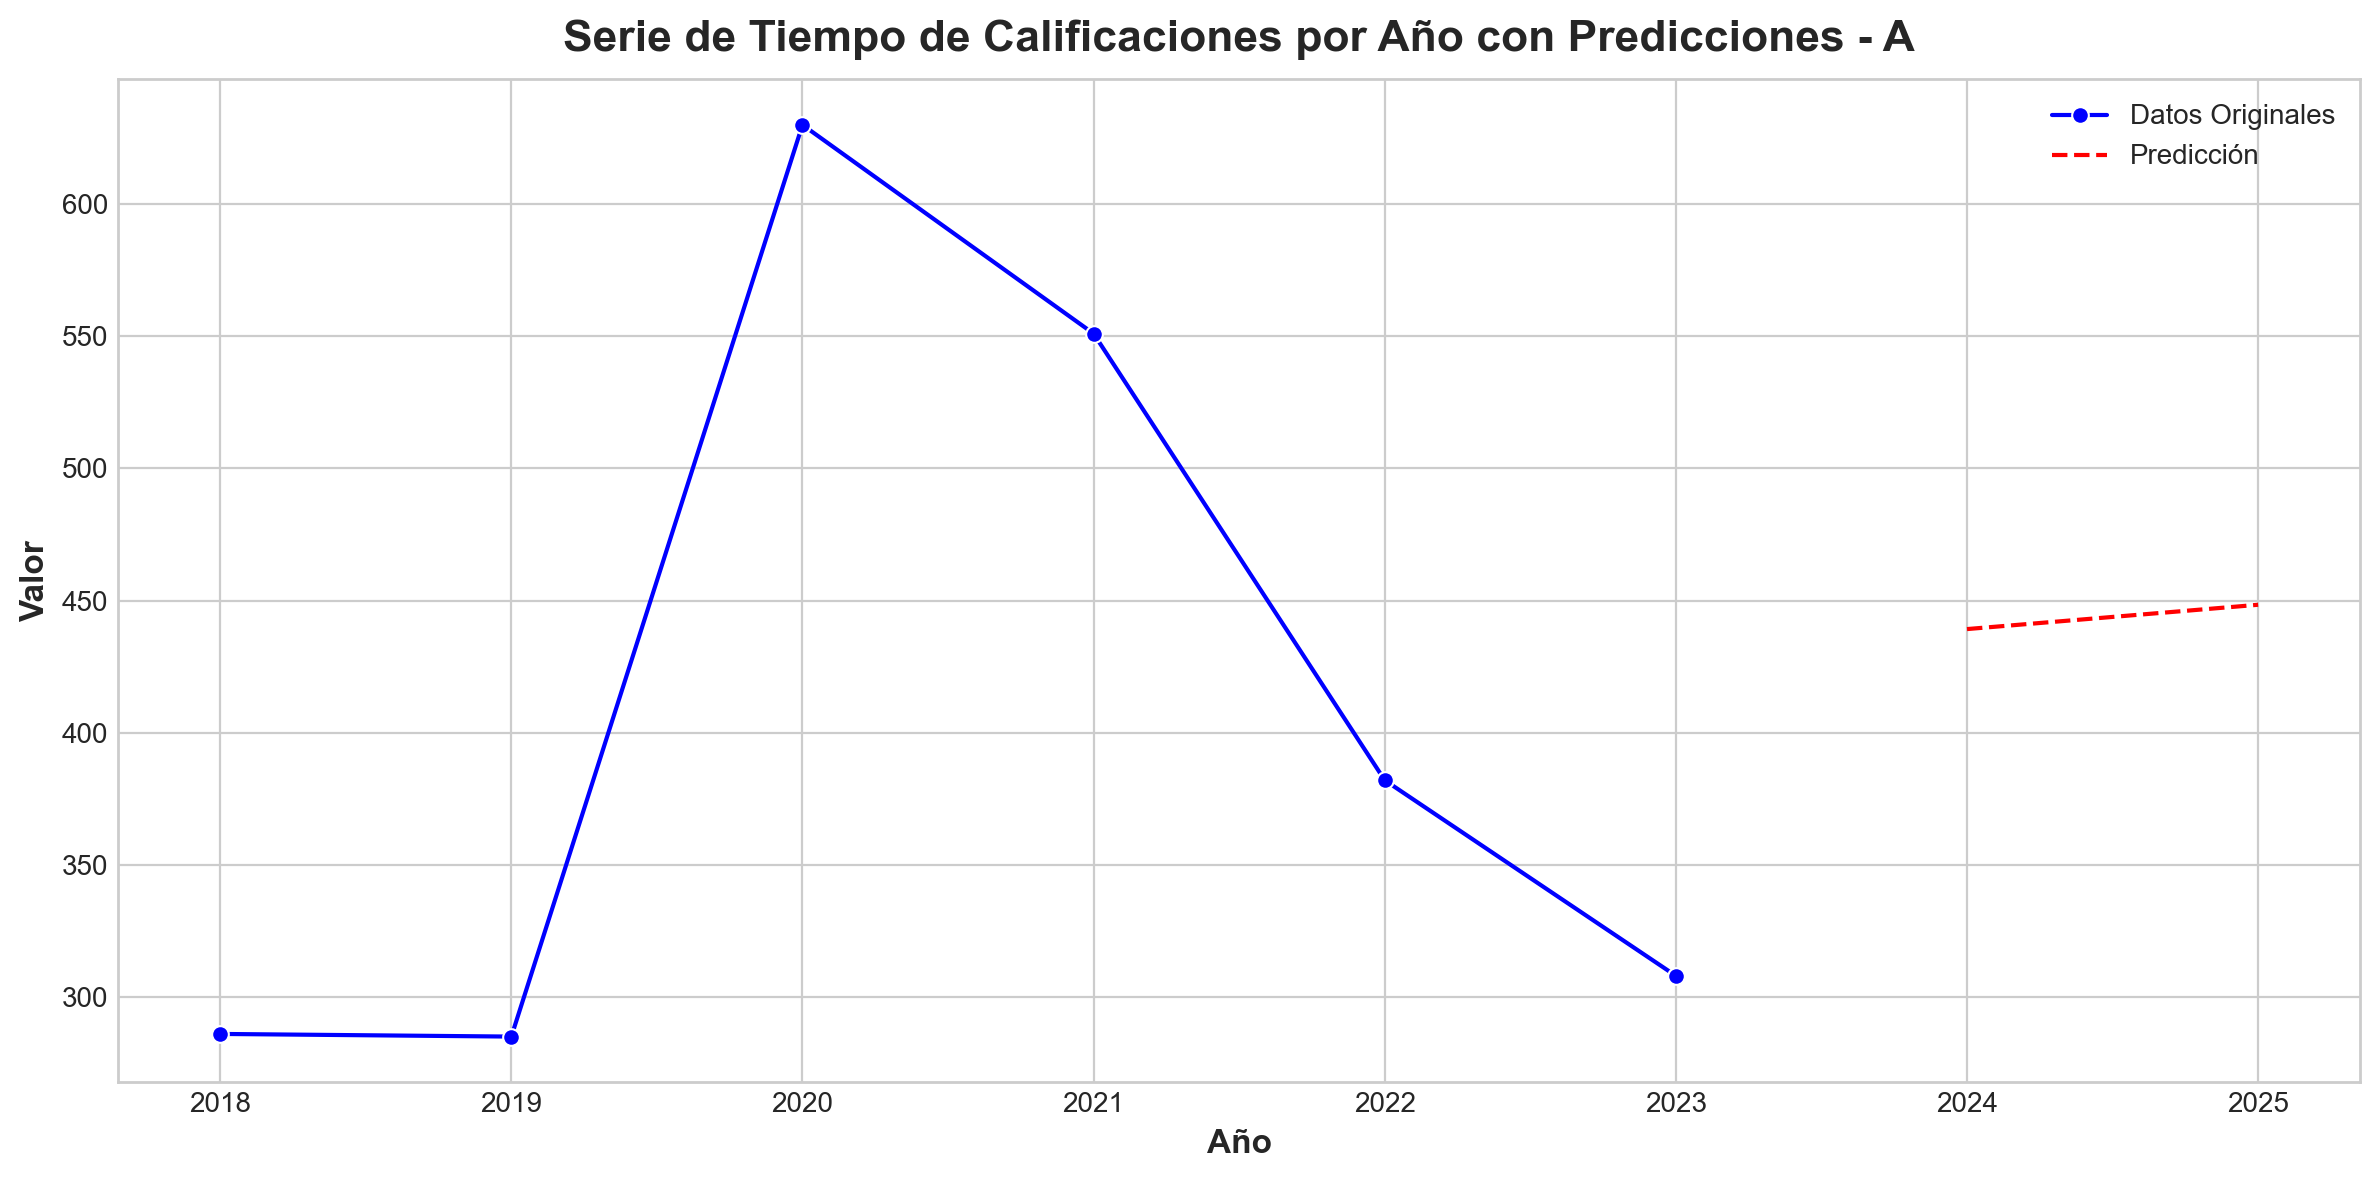

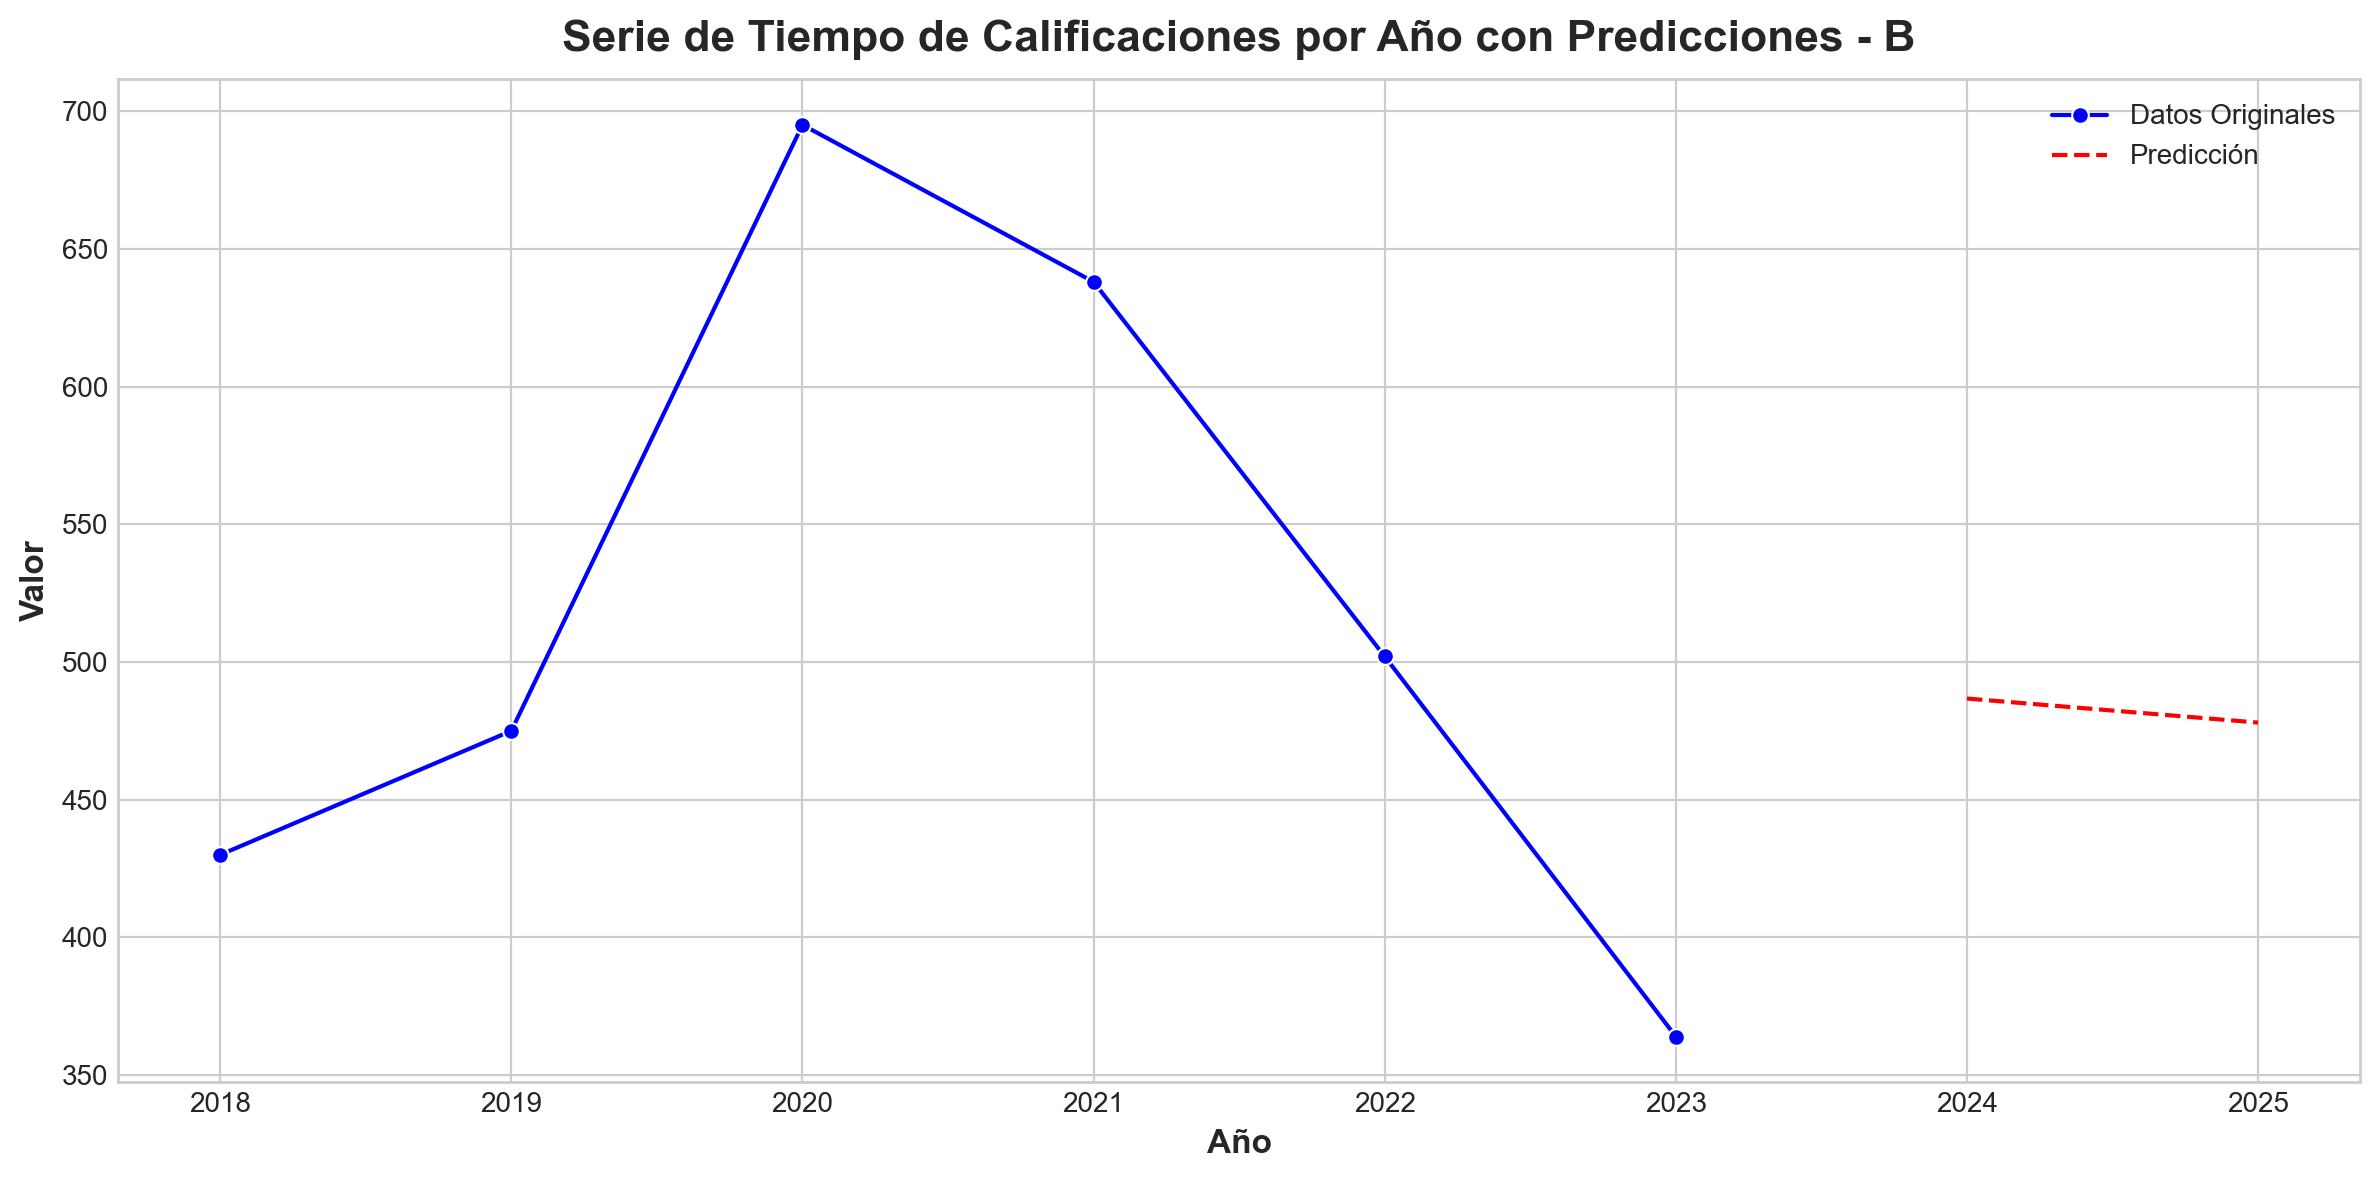

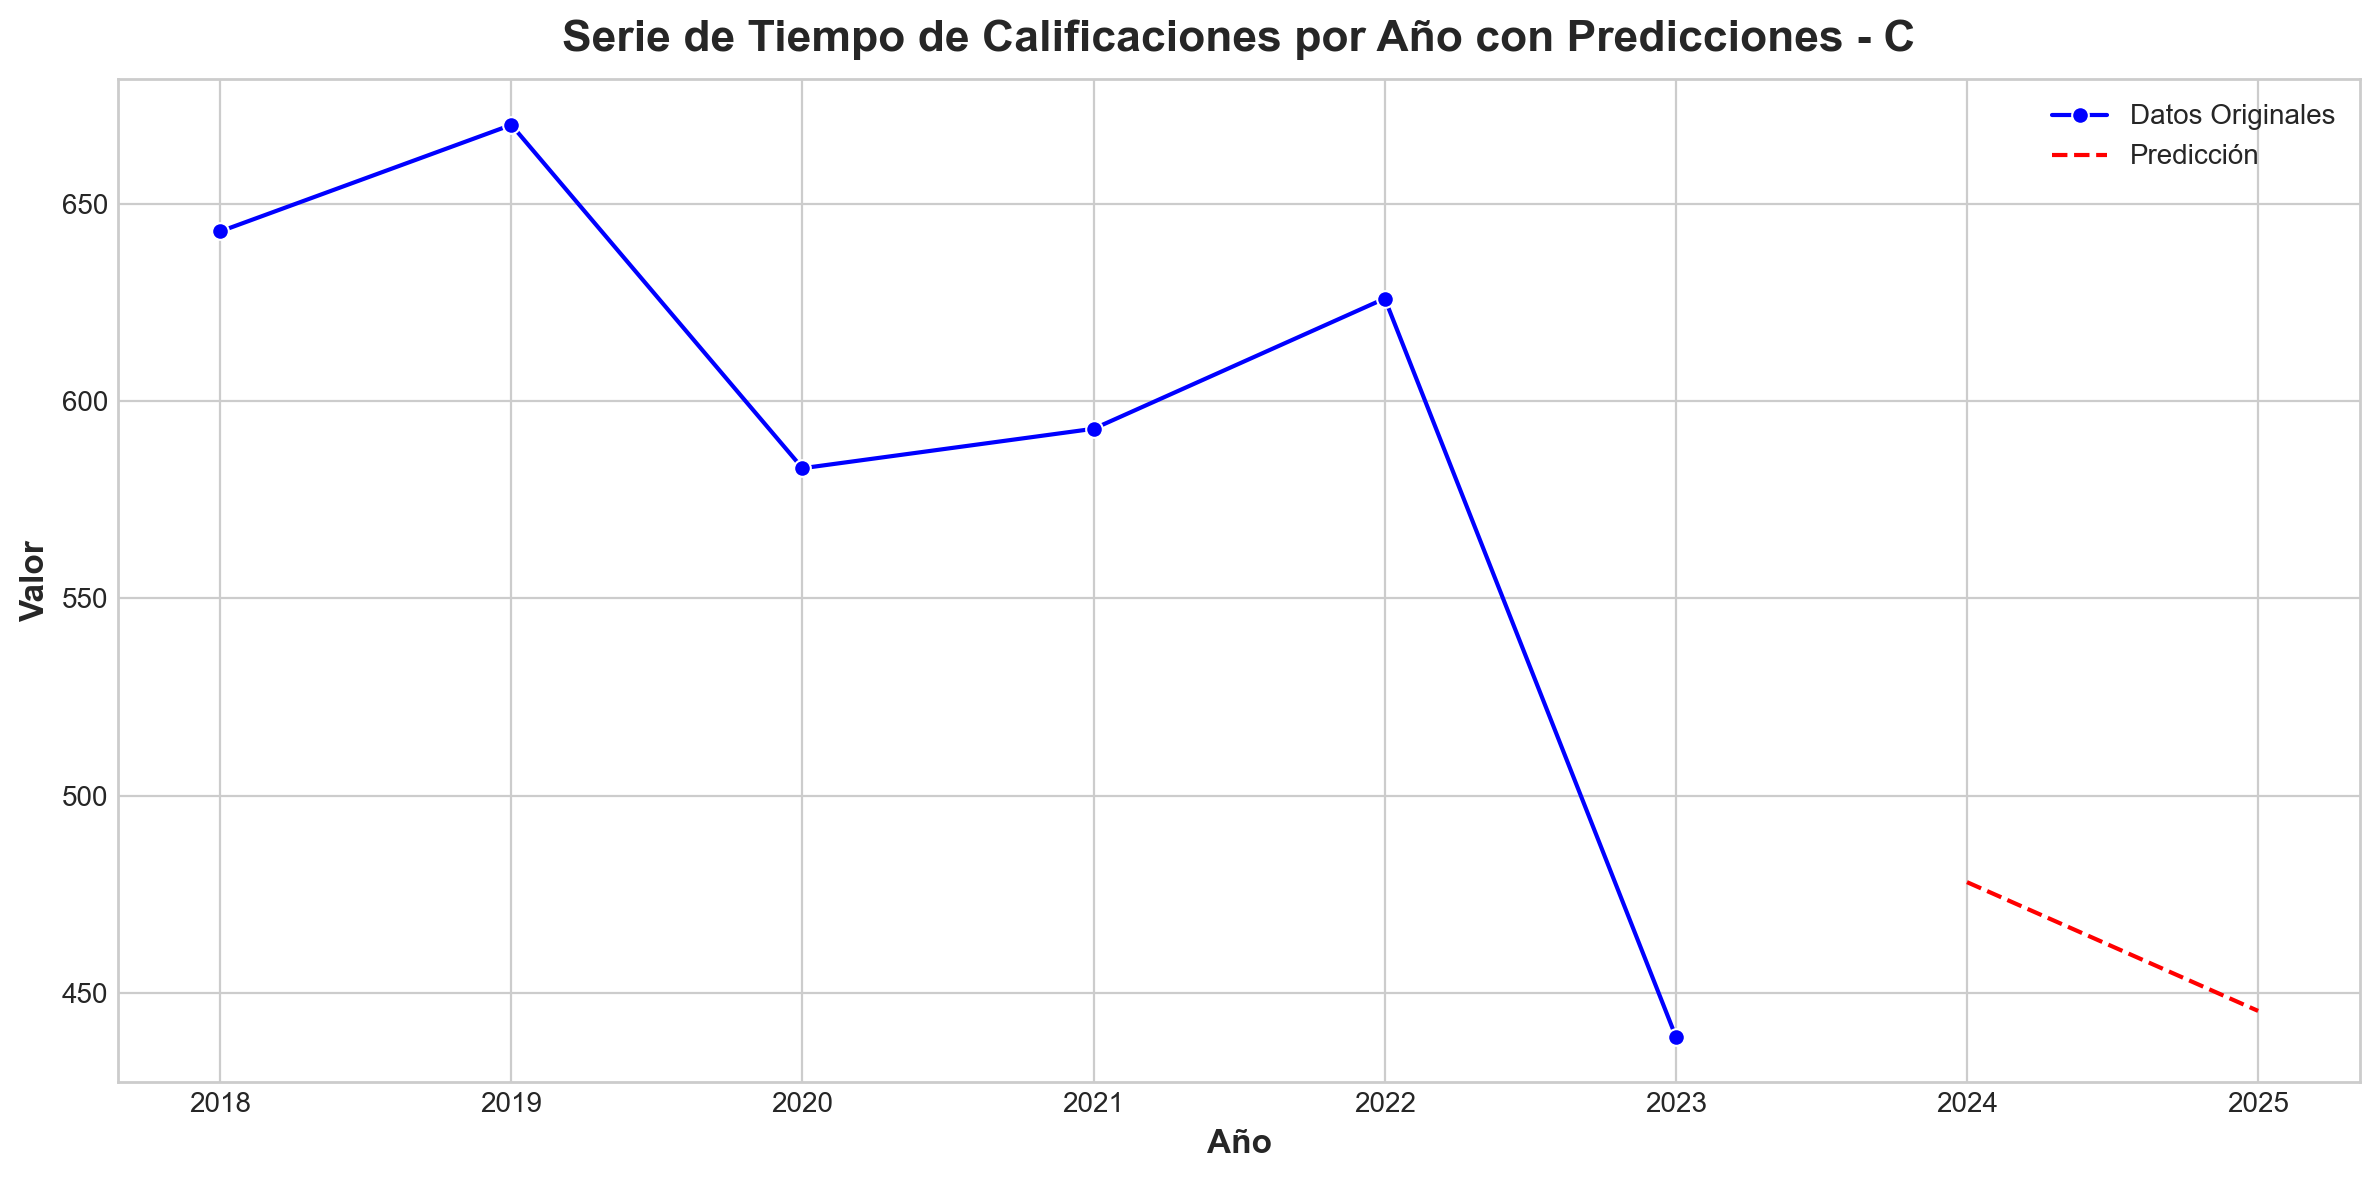

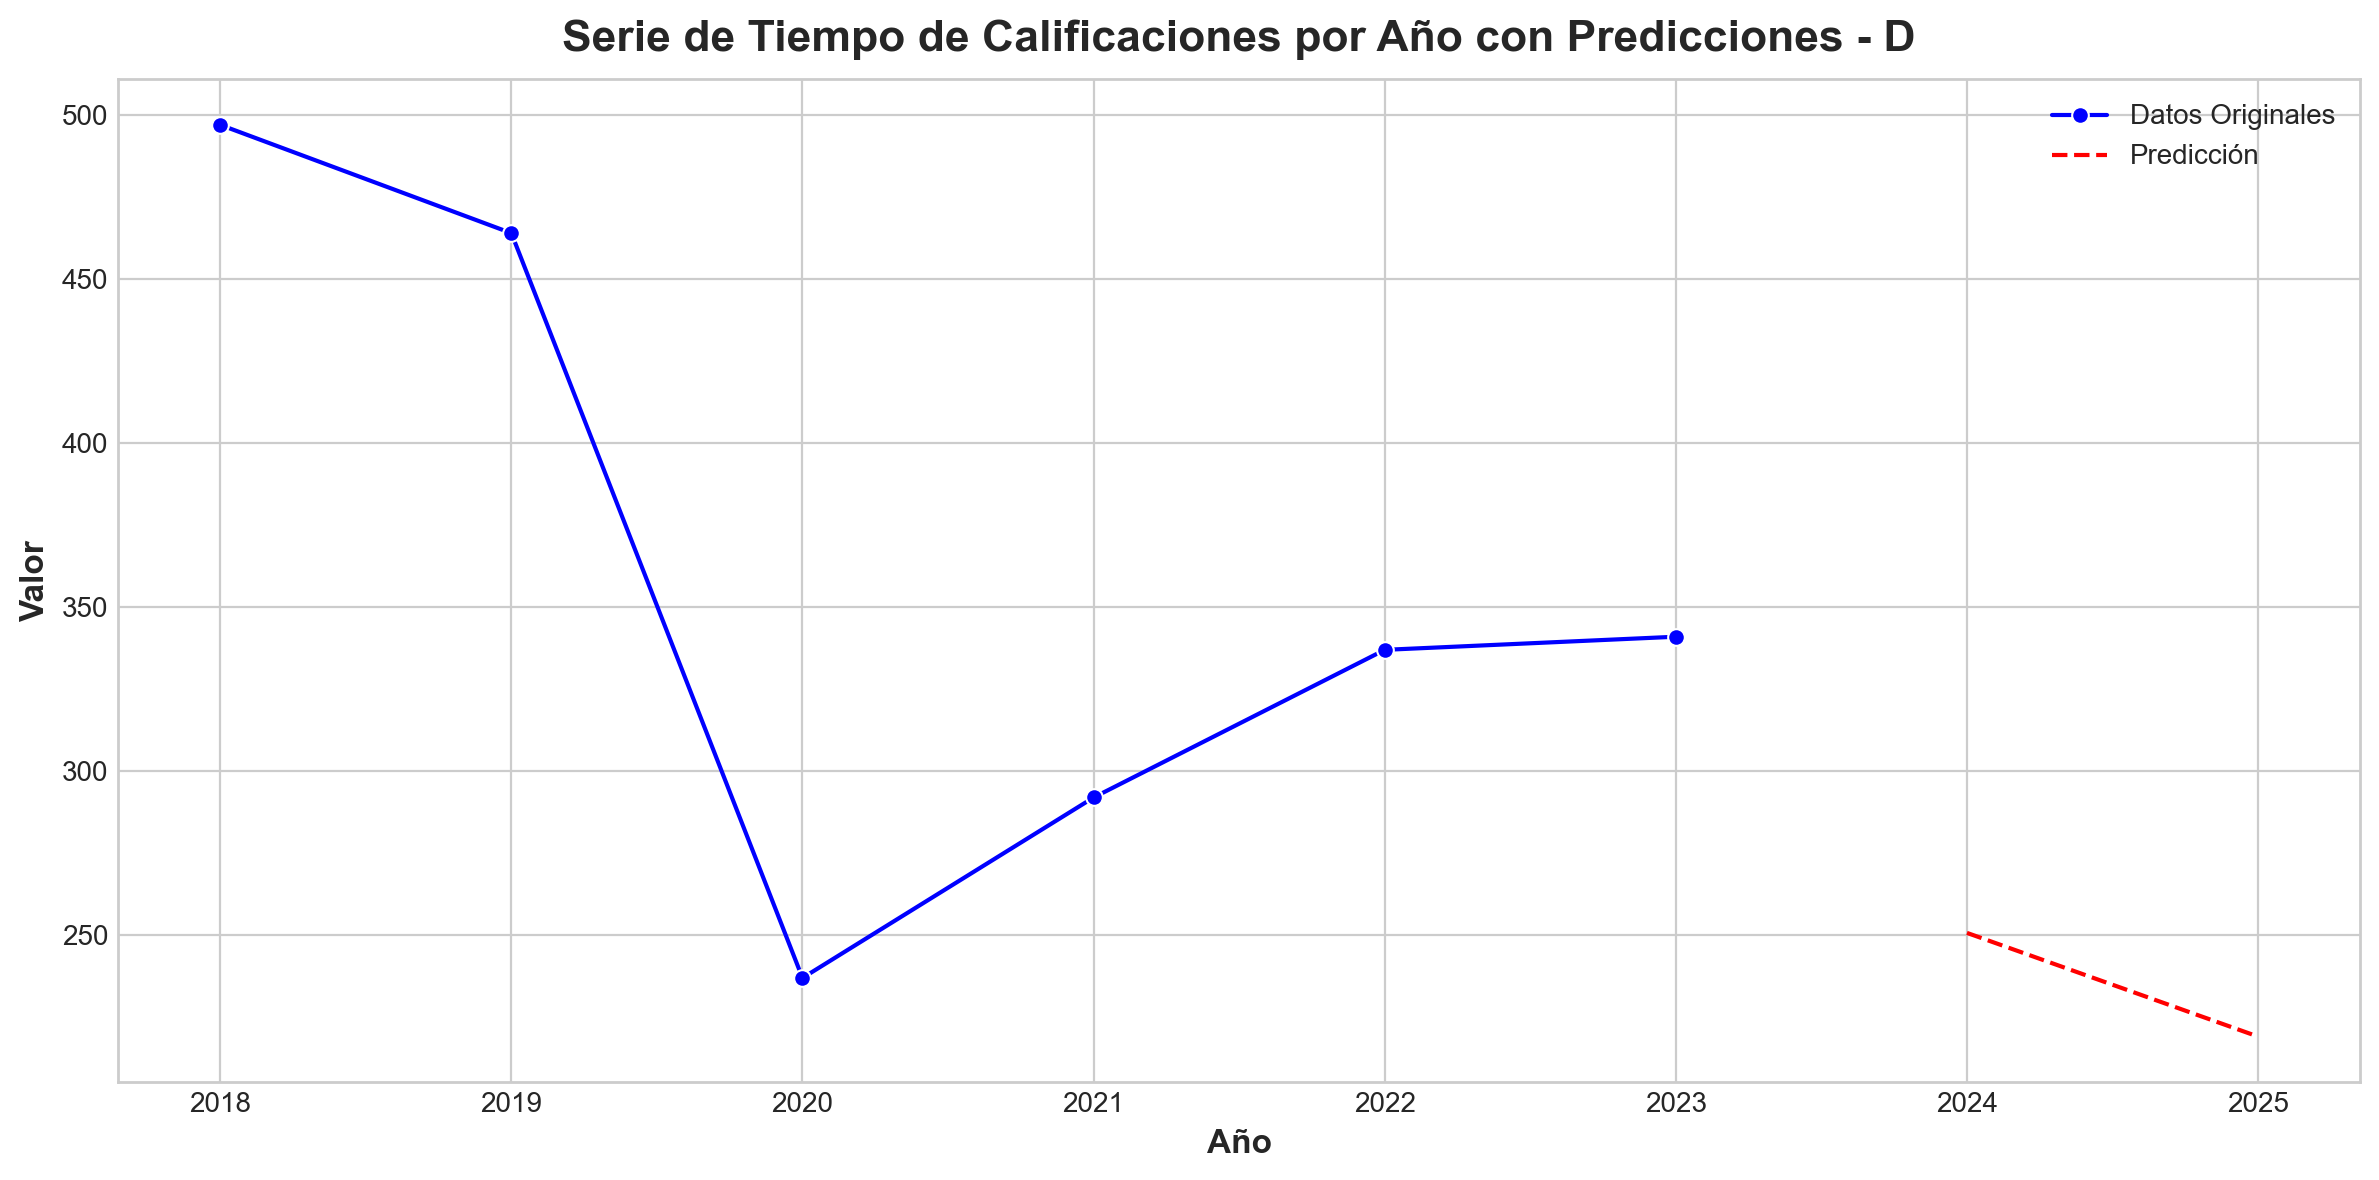

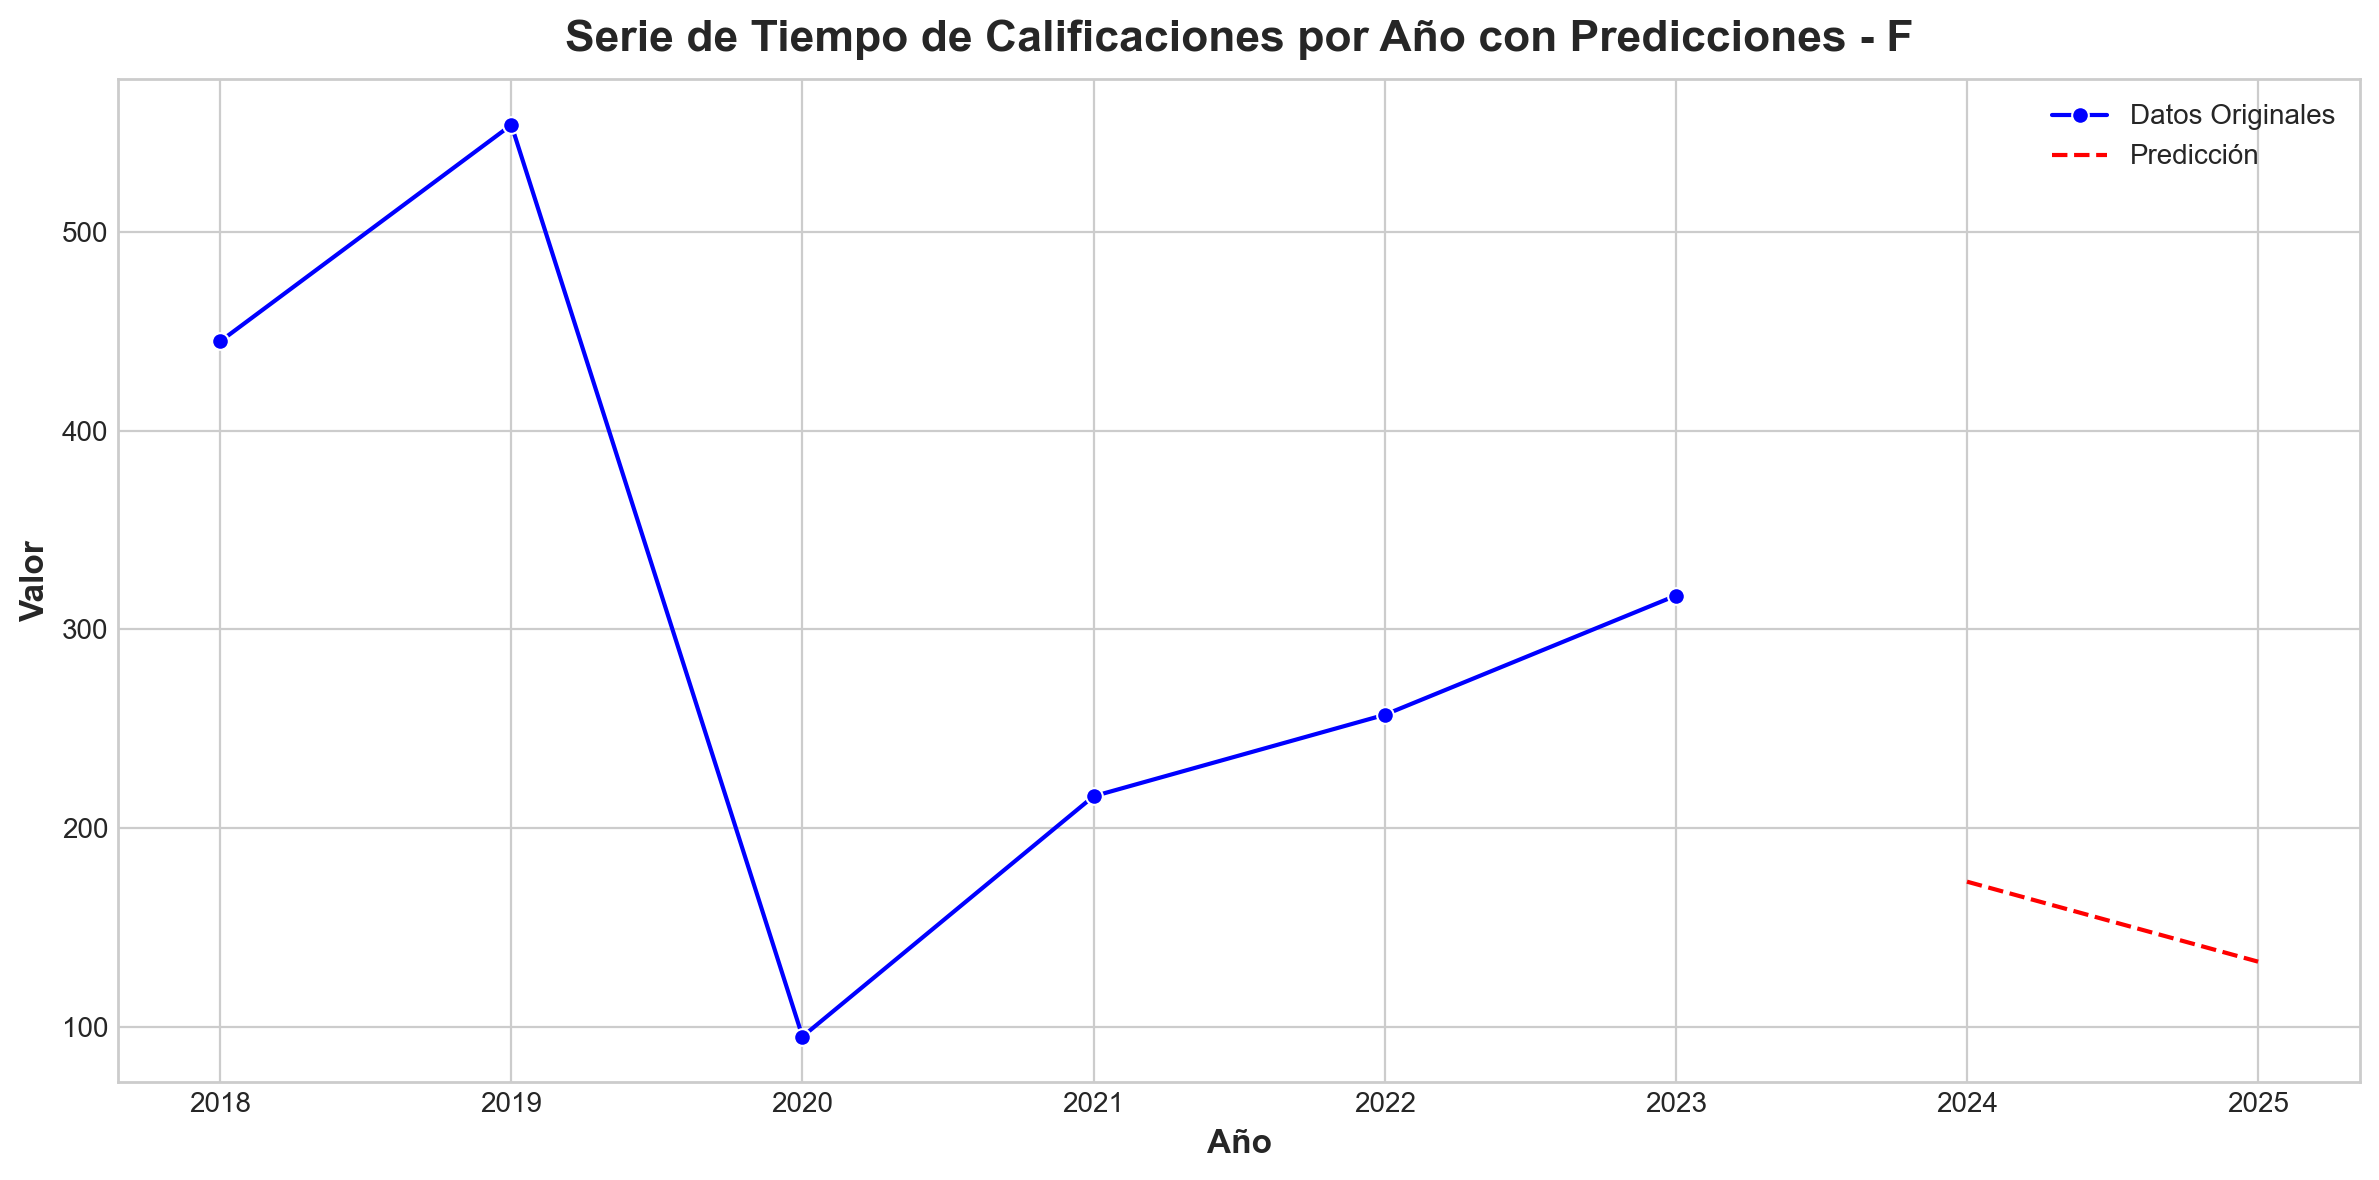

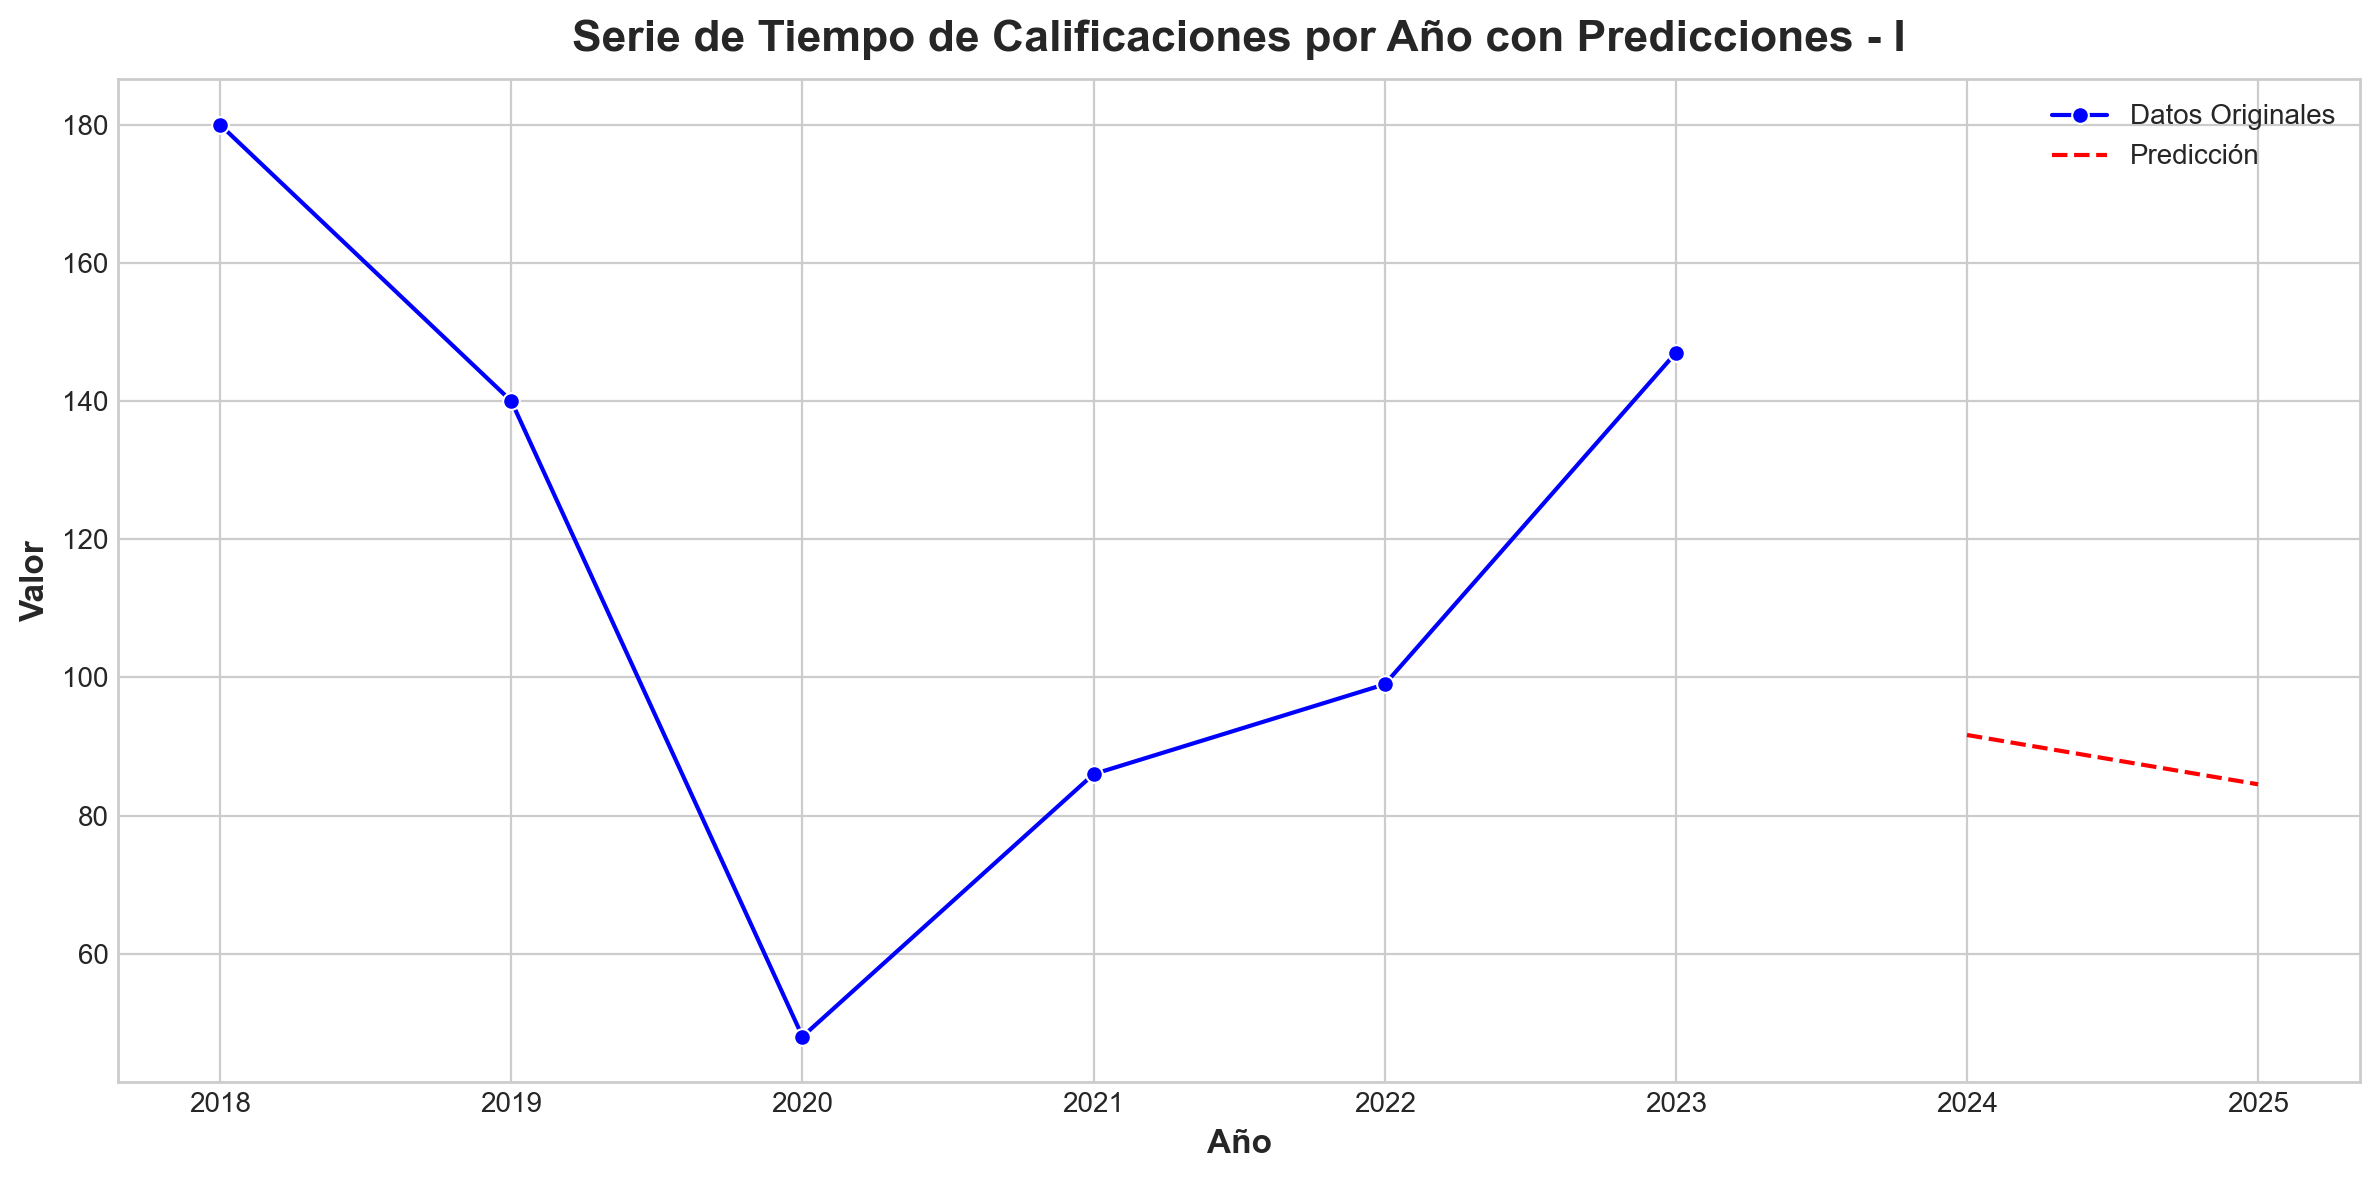

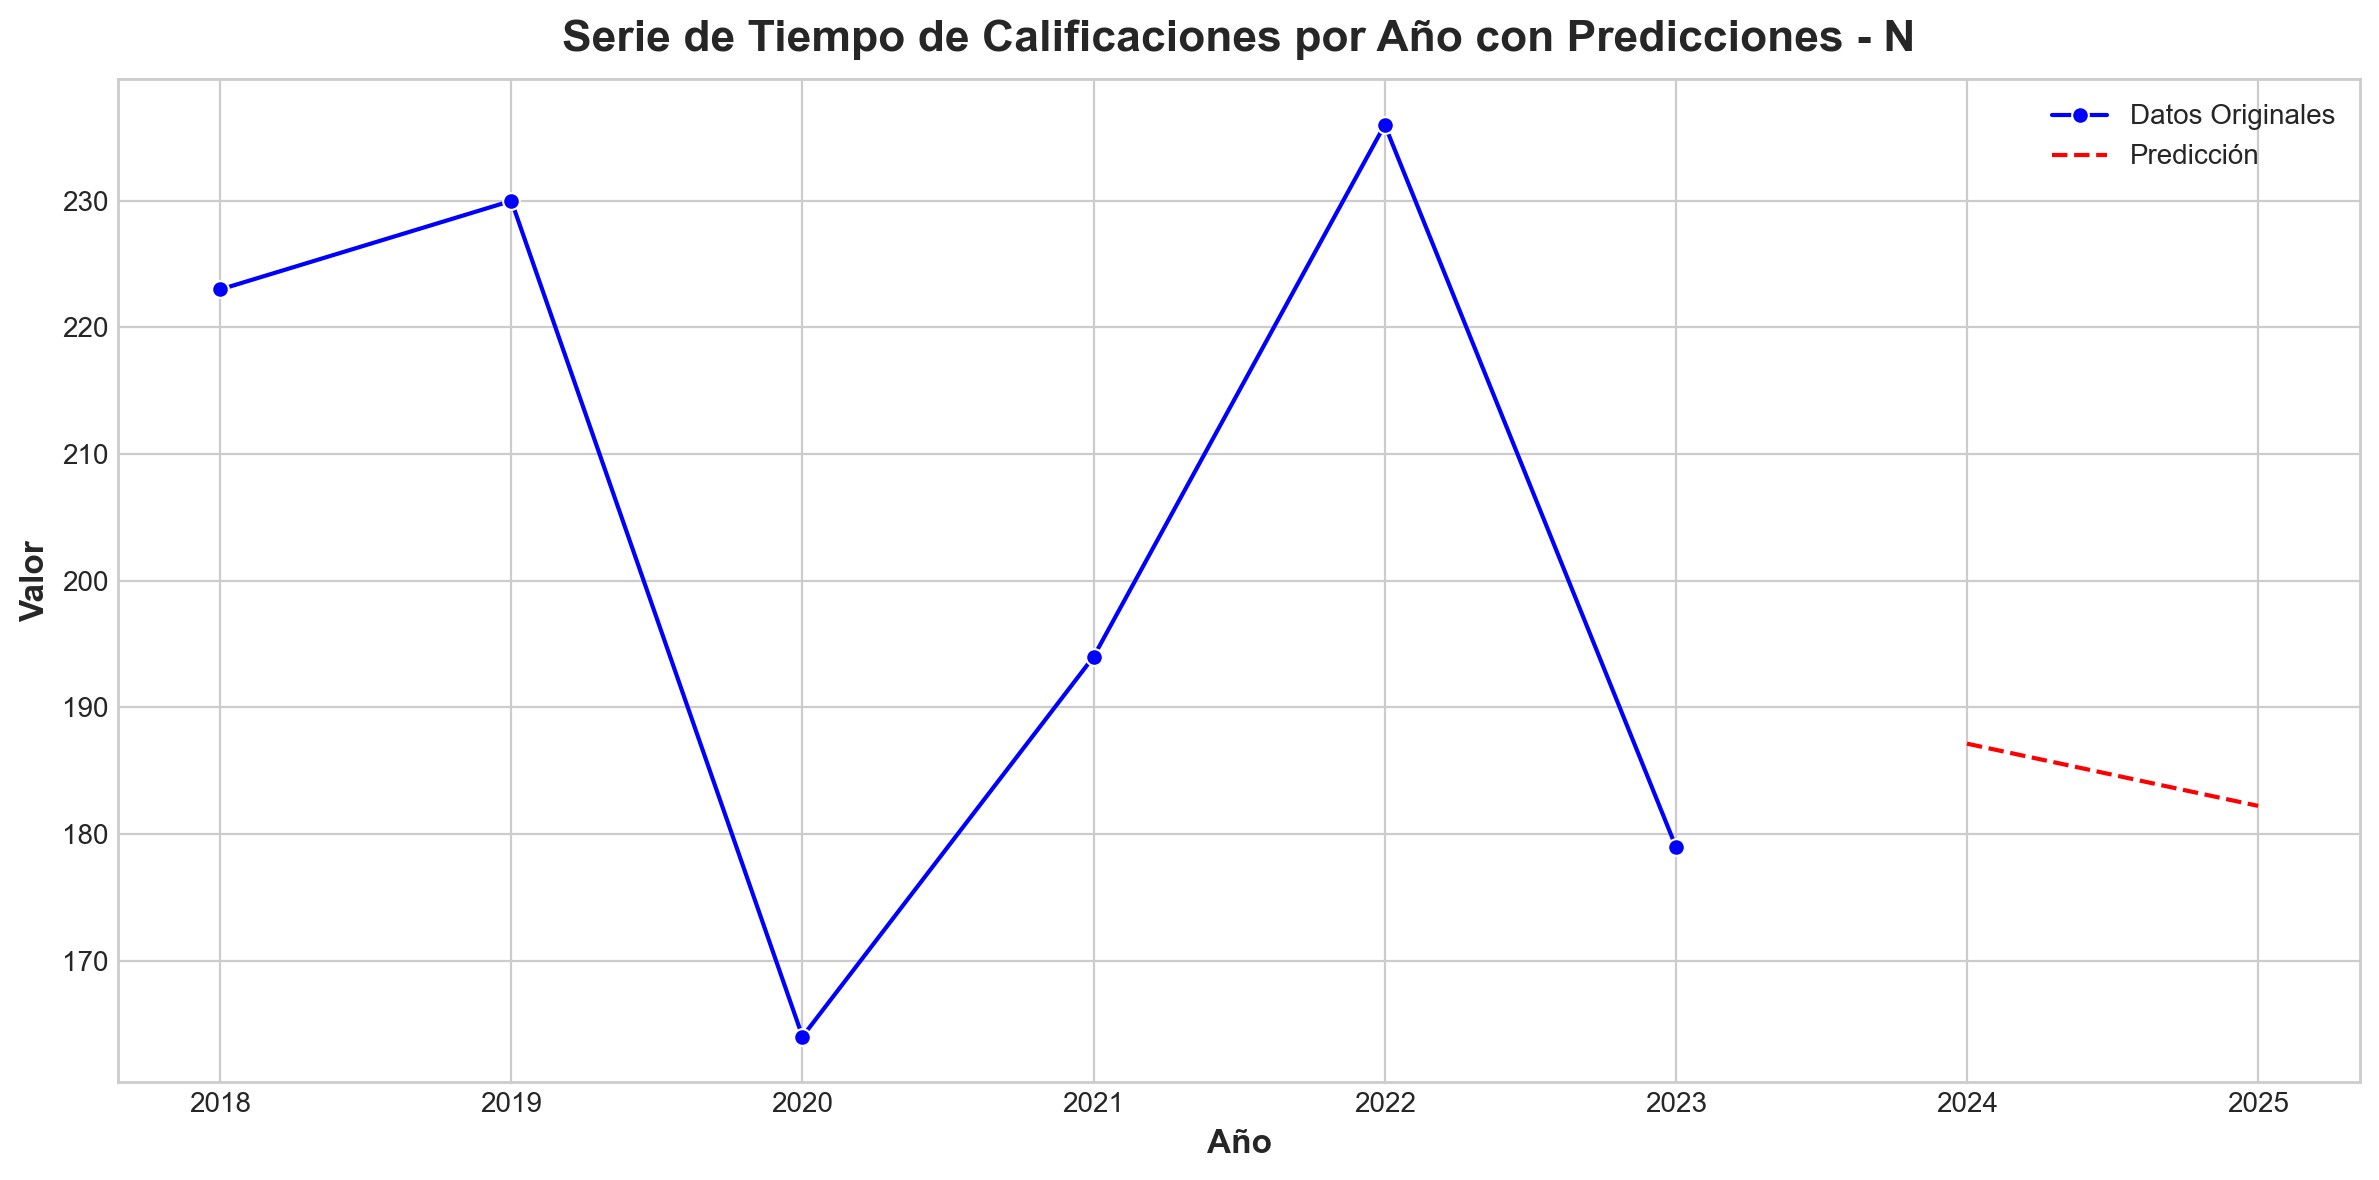

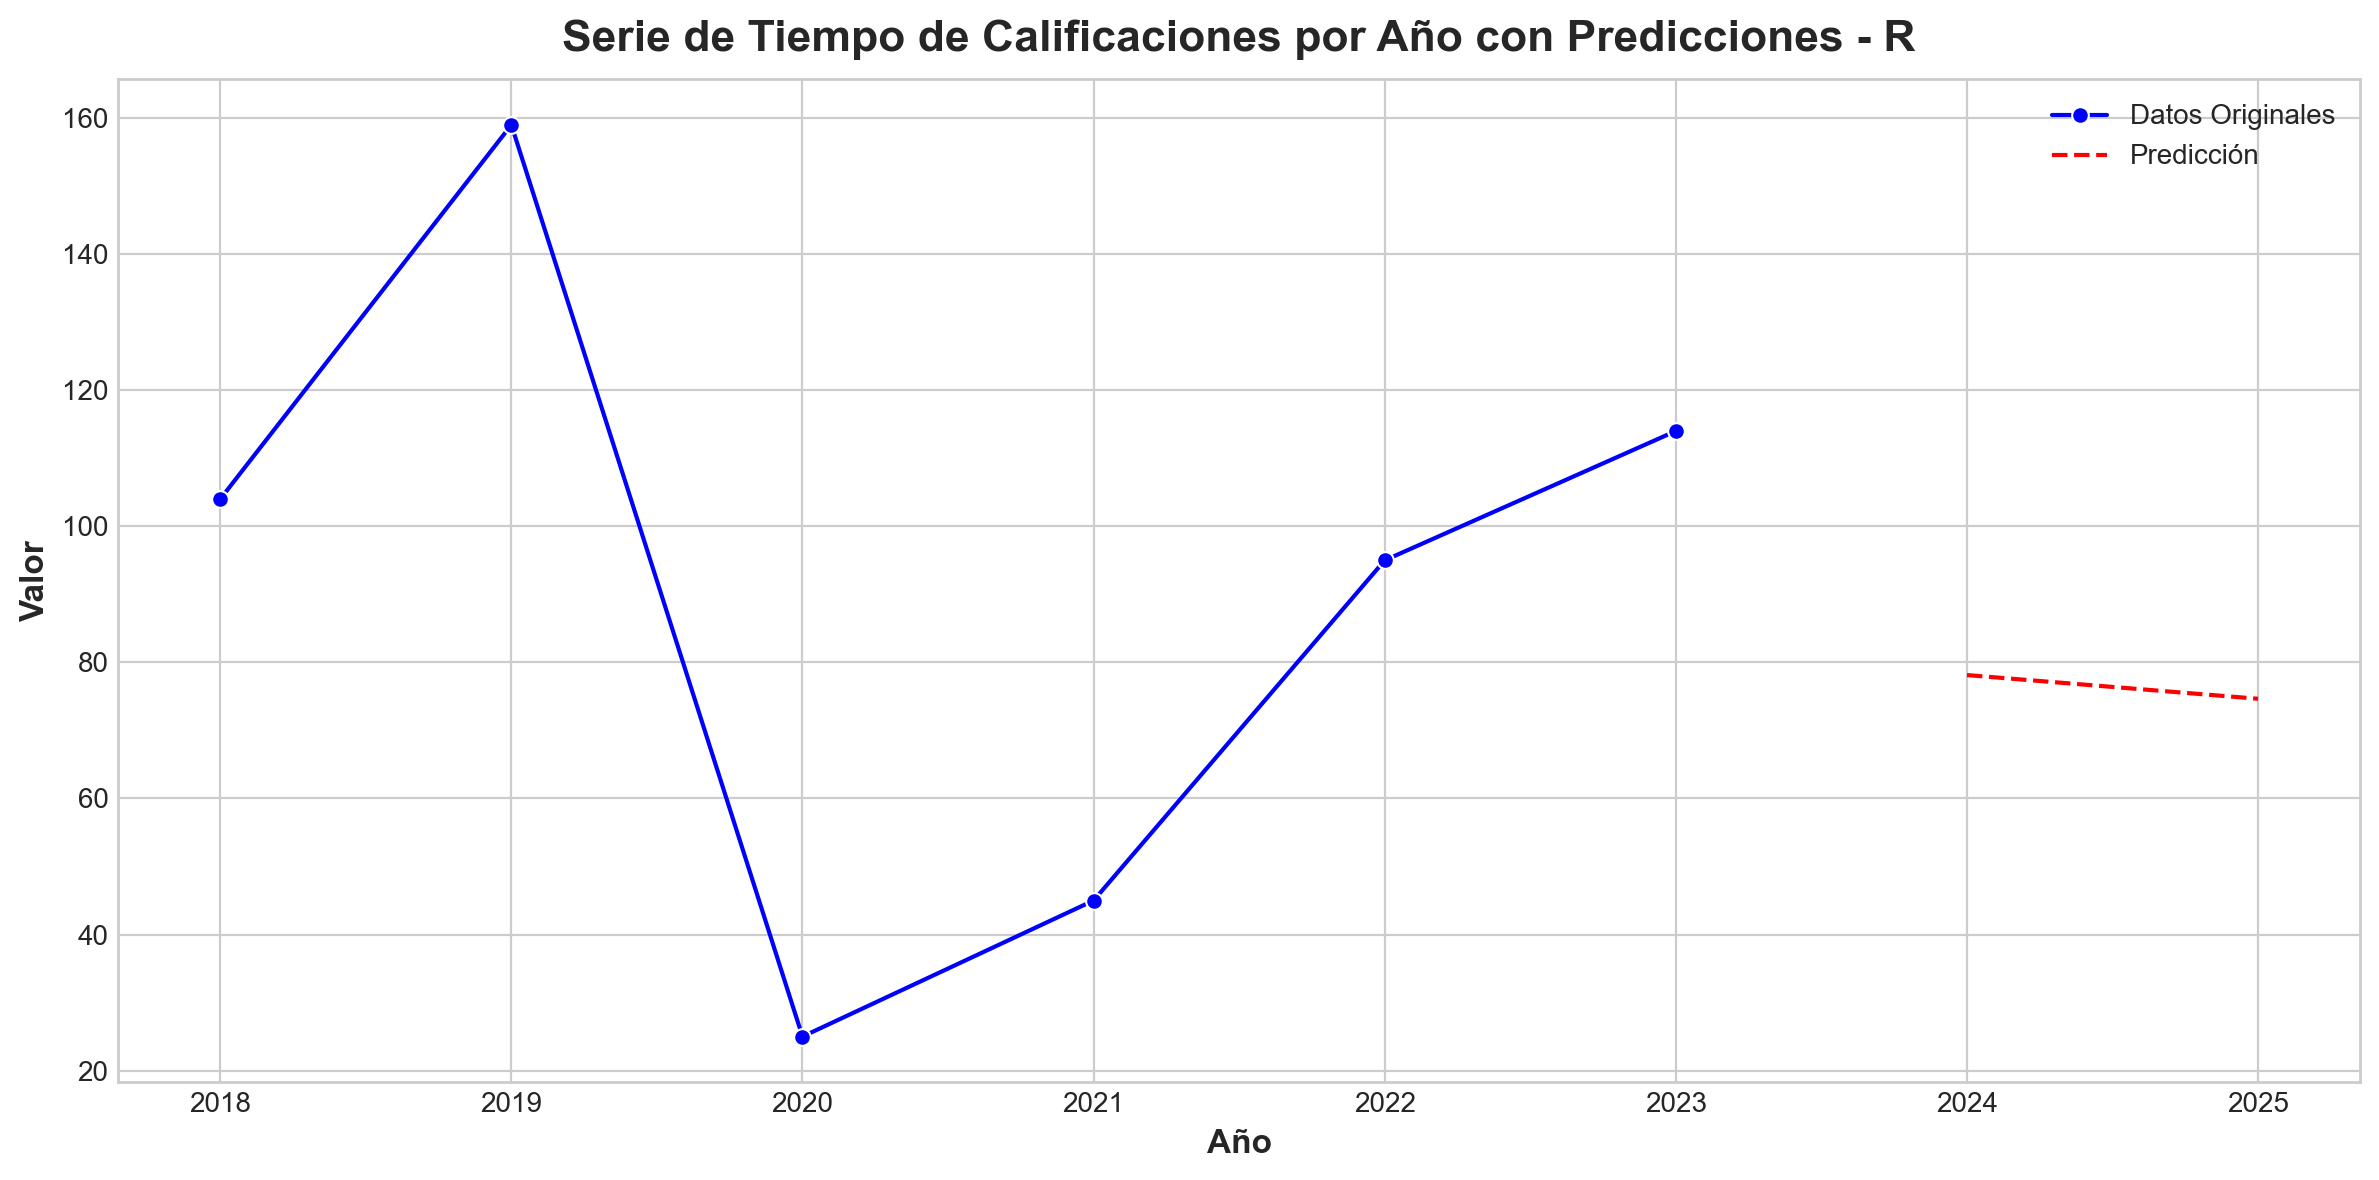

In [34]:
# Crear gráficos de serie de tiempo separados para cada calificación
for calificacion, df_forecast in predictions1.items():
    plt.figure(figsize=(12, 6))
    
    # Datos originales
    df_subset = df_long[df_long['CALIFICACION'] == calificacion]
    sns.lineplot(data=df_subset, x='Year', y='Valor', marker='o', color='b', label='Datos Originales')
    
    # Predicciones
    sns.lineplot(data=df_forecast, x='Year', y='Valor', linestyle='--', color='r', label='Predicción')
    
    # Configurar el gráfico
    plt.title(f'Serie de Tiempo de Calificaciones por Año con Predicciones - {calificacion}')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()